<a href="https://colab.research.google.com/github/vg2655-wq/Midterm-Data-Bootcamp/blob/main/Midterm_Analyzing_and_Comparing_Large_Streaming_Services.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Midterm -

Analyzing streaming service capital and trends using the yahoo finance API and Webscraping for fundamental analysis


By:

Vaasu Gadiparthi

Ben Gelchinsky

Ethan Hu

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

[*********************100%***********************]  6 of 6 completed


<Axes: xlabel='Date'>

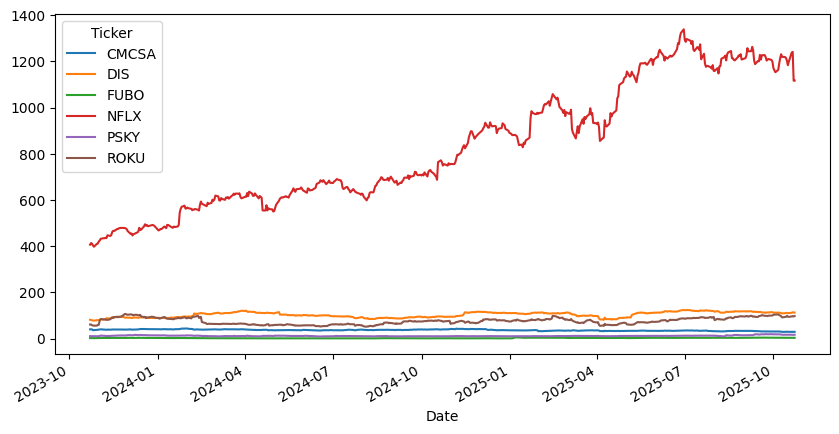

In [ ]:
#Pulls data of all desired streaming services from Yahoo Finance
data = yf.Tickers('FUBO NFLX ROKU DIS CMCSA PSKY')

#Creates a dataFrame with all data from each company over the past year
data_df = data.history(period='2y')

#plots said data with date automatically on the x-axis and the closing price on the y-axis
data_df.plot(y='Close', figsize=(10, 5))

<Axes: xlabel='Date'>

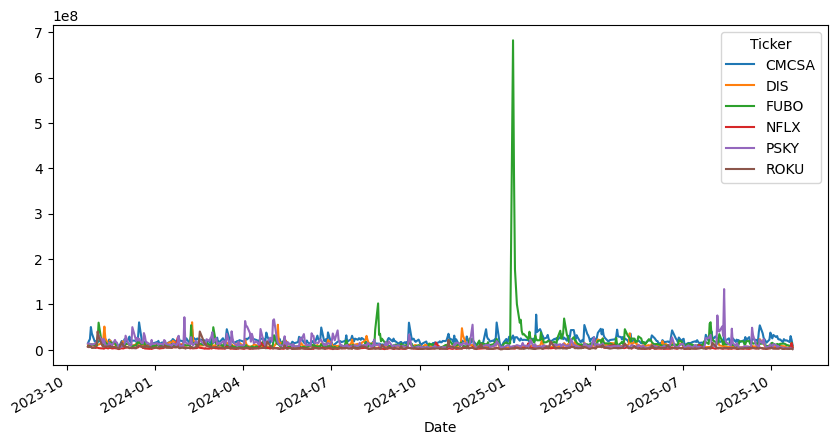

In [ ]:
data_df.plot(y='Volume', figsize=(10, 5))

In [ ]:
data_df

Price           Close                                                        \
Ticker          CMCSA         DIS   FUBO         NFLX       PSKY       ROKU   
Date                                                                          
2023-10-23  40.169453   81.737373  2.370   406.839996  10.829192  61.180000   
2023-10-24  40.655903   81.206238  2.550   413.730011  10.790481  61.419998   
2023-10-25  39.991718   79.268532  2.400   411.250000  10.587252  58.500000   
2023-10-26  36.623997   78.471825  2.440   403.540009  10.548543  56.410000   
2023-10-27  37.082378   78.029205  2.250   397.869995  10.354991  56.349998   
...               ...         ...    ...          ...        ...        ...   
2025-10-17  29.540001  110.669998  3.640  1199.359985  16.770000  94.209999   
2025-10-20  29.570000  111.959999  3.650  1238.560059  16.990000  96.279999   
2025-10-21  29.969999  114.300003  3.650  1241.349976  16.510000  97.489998   
2025-10-22  29.400000  113.080002  3.470  1116.369995  16.570000  96.029999   
2025-10-23  29.500000  113.750000  3.545  1122.785034  16.700001  97.294998   

Price      Dividends                 ... Stock Splits                 \
Ticker         CMCSA  DIS FUBO NFLX  ...         FUBO NFLX PSKY ROKU   
Date                                 ...                               
2023-10-23       0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0   
2023-10-24       0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0   
2023-10-25       0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0   
2023-10-26       0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0   
2023-10-27       0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0   
...              ...  ...  ...  ...  ...          ...  ...  ...  ...   
2025-10-17       0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0   
2025-10-20       0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0   
2025-10-21       0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0   
2025-10-22       0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0   
2025-10-23       0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0   

Price         Volume                                                   
Ticker         CMCSA       DIS      FUBO      NFLX      PSKY     ROKU  
Date                                                                   
2023-10-23  14469400  10772500   7570800   7390000  13490700  6281200  
2023-10-24  19539800  11499500  10302200   6459200  13659000  5607700  
2023-10-25  23342900   9372500   7933700   6299600  12903900  6670900  
2023-10-26  50005400  11651000  10944000   6849700  12000800  6329900  
2023-10-27  35949000  10300600  12130700   4997600  11126900  3997200  
...              ...       ...       ...       ...       ...      ...  
2025-10-17  20680900  10090500  10174500   2957100   4216200  1972700  
2025-10-20  16881400   8047500   8732600   3986200   2422000  1790000  
2025-10-21  30083000   8163200   7517200   6508200   4350700  2168100  
2025-10-22  21989500   7565200  15792300  14721100   2653100  2815400  
2025-10-23   1245259    314095    656938    807460    210945    75770  

[503 rows x 42 columns]

In [ ]:
#seperates the data by Ticker and only keeps the closing price values
data_single_index = data_df['Close'].unstack()
data_single_index

Ticker  Date      
CMCSA   2023-10-23    40.169456
        2023-10-24    40.655903
        2023-10-25    39.991718
        2023-10-26    36.623989
        2023-10-27    37.082371
                        ...    
ROKU    2025-10-17    94.209999
        2025-10-20    96.279999
        2025-10-21    97.489998
        2025-10-22    96.029999
        2025-10-23    97.900002
Length: 3018, dtype: float64

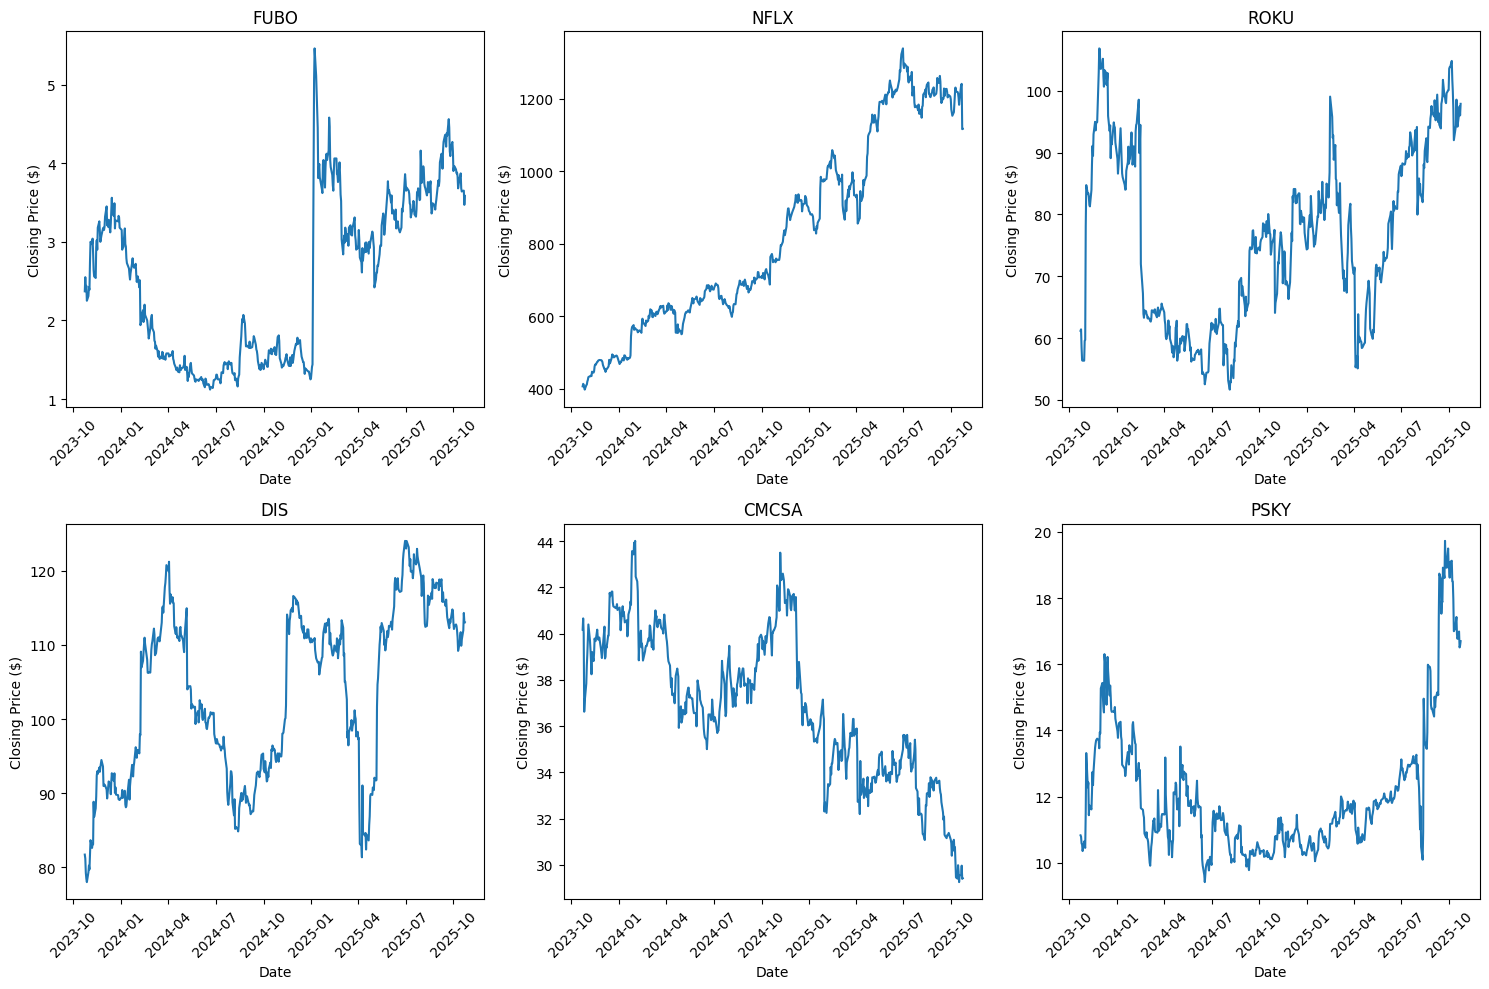

In [ ]:
#create list of services to iterate through
services = ['FUBO', 'NFLX', 'ROKU', 'DIS', 'CMCSA', 'PSKY']

#create figure with 6 blank axes
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

#iterate over each service, plotting closing price over time
for service in services:

    #assign the axis to plot to
    row = services.index(service) // 3
    col = services.index(service) % 3

    #graphing
    sns.lineplot(data=data_single_index[service], ax=axs[row, col])

    #set graph title and name axes
    axs[row, col].set_title(service)
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Closing Price ($)')

    #rotate dates to avoid overlap
    axs[row, col].tick_params(axis = 'x', rotation=45)

#tight layout to avoid overlap
plt.tight_layout()
plt.show()

/tmp/ipython-input-1618882106.py:12: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  price_df.resample('Q').last()


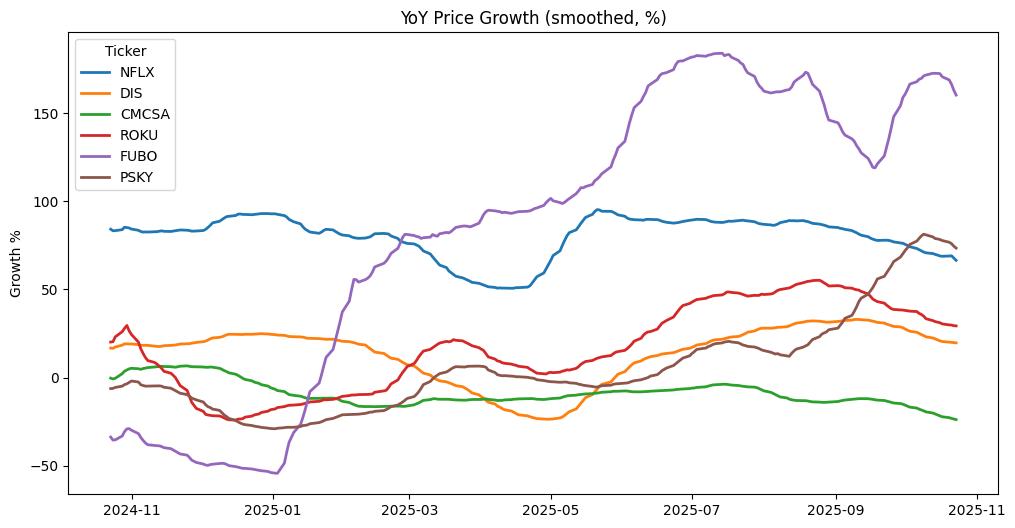

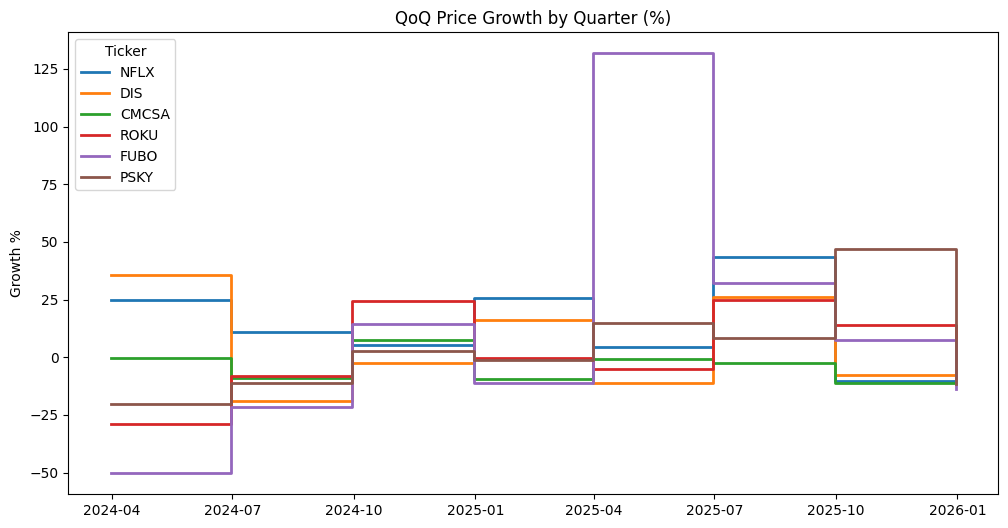

,Total Return %,Latest QoQ %
Ticker,,
NFLX,174.58,-6.82
ROKU,60.02,-2.23
PSKY,54.21,-11.73
FUBO,51.27,-13.61
DIS,38.30,-1.28
CMCSA,-26.75,-5.36


In [ ]:
#GROWTH CURVES: YoY & QoQ for streaming tickers

# Grab close prices from your multi-index data_df (Price->Close->Ticker)
price_df = data_df['Close'].copy()
price_df = price_df[['NFLX','DIS','CMCSA','ROKU','FUBO','PSKY']].dropna(how='all', axis=1)

# YoY % change (252 trading days = 1 year)
yoy = price_df.pct_change(252) * 100

# QoQ % change (calendar quarter, last trading day each quarter)
qoq = (
    price_df.resample('Q').last()
            .pct_change() * 100
)

#Plot for YoY curves (smoothed 21d rolling to reduce noise)
yoy_smooth = yoy.rolling(21, min_periods=1).mean()

plt.figure(figsize=(12,6))
for col in yoy_smooth.columns:
    plt.plot(yoy_smooth.index, yoy_smooth[col], label=col, linewidth=2)
plt.title('YoY Price Growth (smoothed, %)')
plt.ylabel('Growth %')
plt.legend(
    title='Ticker',
    loc='upper left',
    fontsize=10
)

plt.show()

# Plot: QoQ growth (step line per quarter)
plt.figure(figsize=(12,6))
for col in qoq.columns:
    plt.step(qoq.index, qoq[col], where='post', label=col, linewidth=2)
plt.title('QoQ Price Growth by Quarter (%)')
plt.ylabel('Growth %')
plt.legend(
    title='Ticker',
    loc='upper left',
    fontsize=10
)
plt.show()

# Leaderboard tables (Total Return + latest QoQ)
# first available price
start_price = price_df.iloc[0]
# last available price
end_price = price_df.iloc[-1]
total_return = ((end_price / start_price) - 1) * 100
total_return = total_return.sort_values(ascending=False).round(2).rename('Total Return %')

latest_qoq = qoq.iloc[-1].dropna().sort_values(ascending=False).round(2).rename('Latest QoQ %')

display(pd.concat([total_return, latest_qoq], axis=1))



/tmp/ipython-input-1031692505.py:17: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  price = t.history(period='2y')['Close'].resample('Q').last()


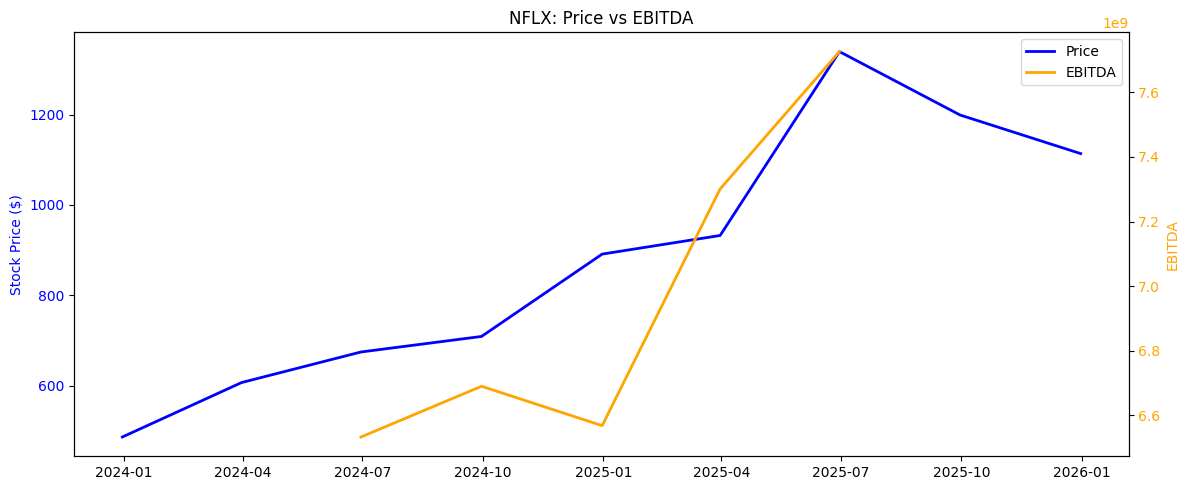

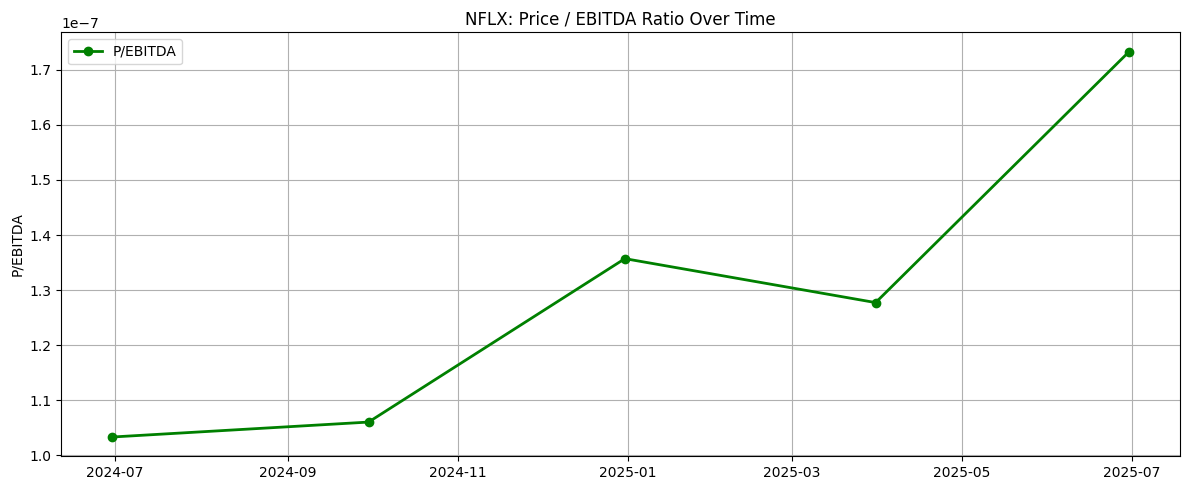

/tmp/ipython-input-1031692505.py:17: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  price = t.history(period='2y')['Close'].resample('Q').last()


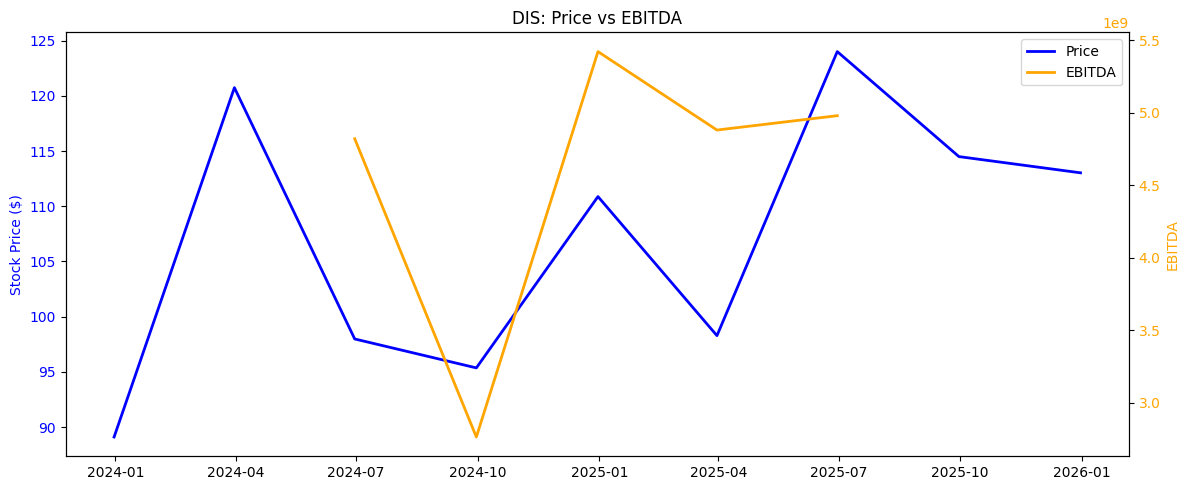

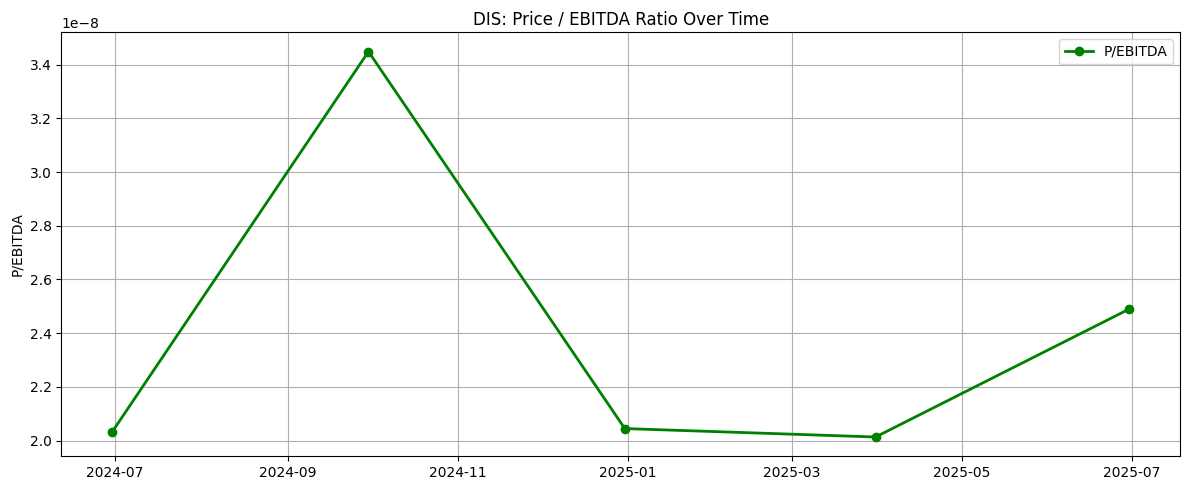

/tmp/ipython-input-1031692505.py:17: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  price = t.history(period='2y')['Close'].resample('Q').last()


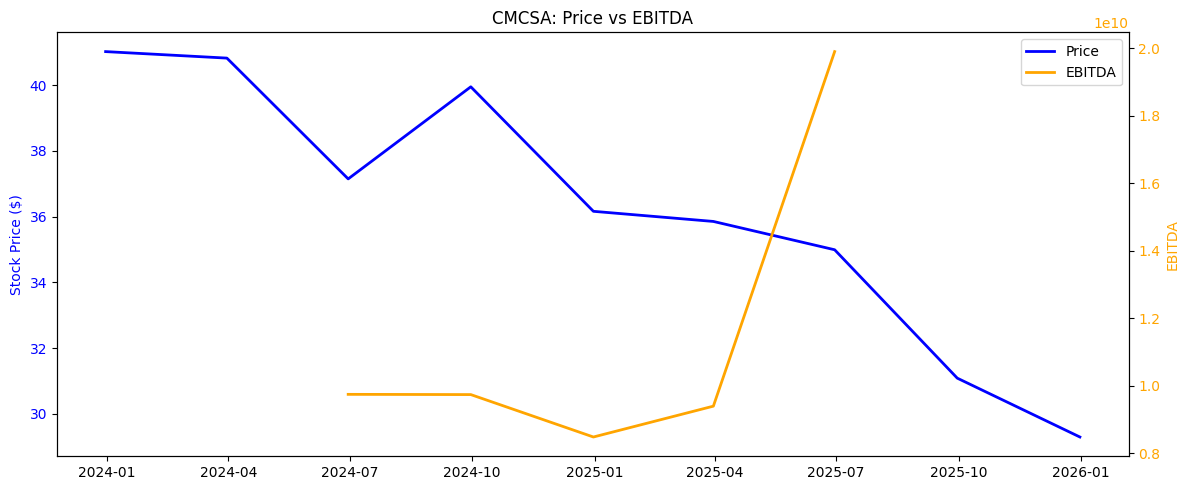

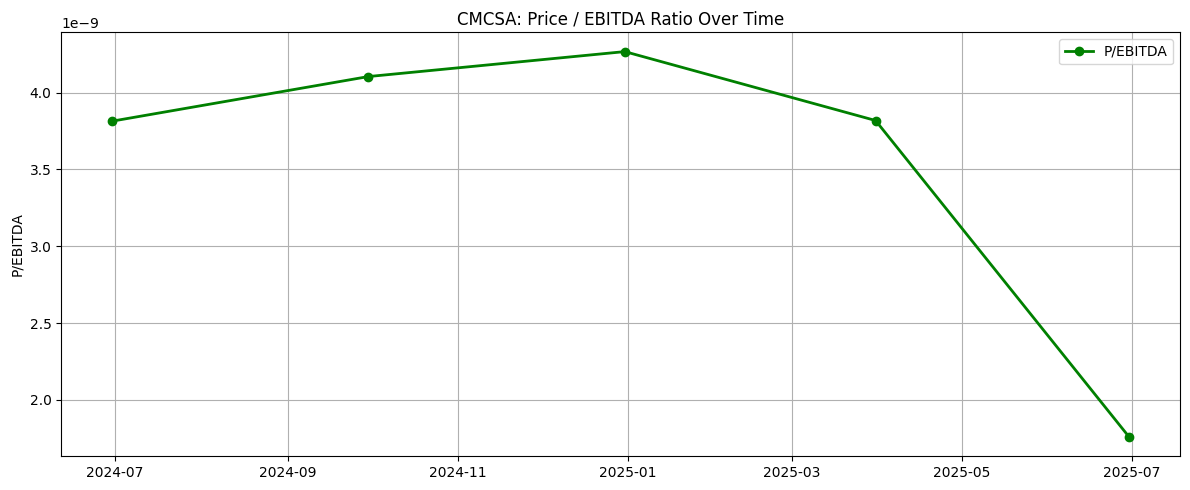

/tmp/ipython-input-1031692505.py:17: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  price = t.history(period='2y')['Close'].resample('Q').last()


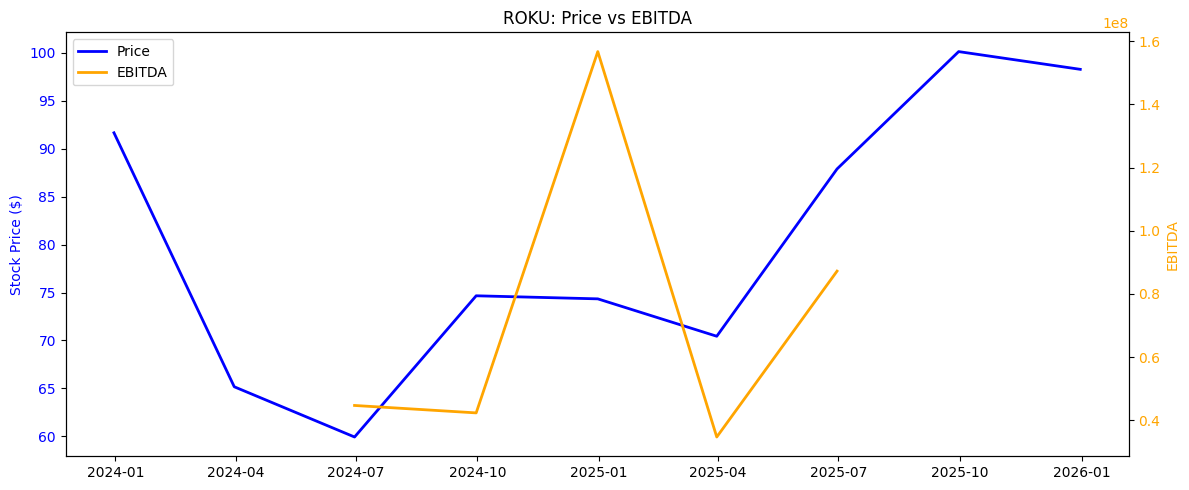

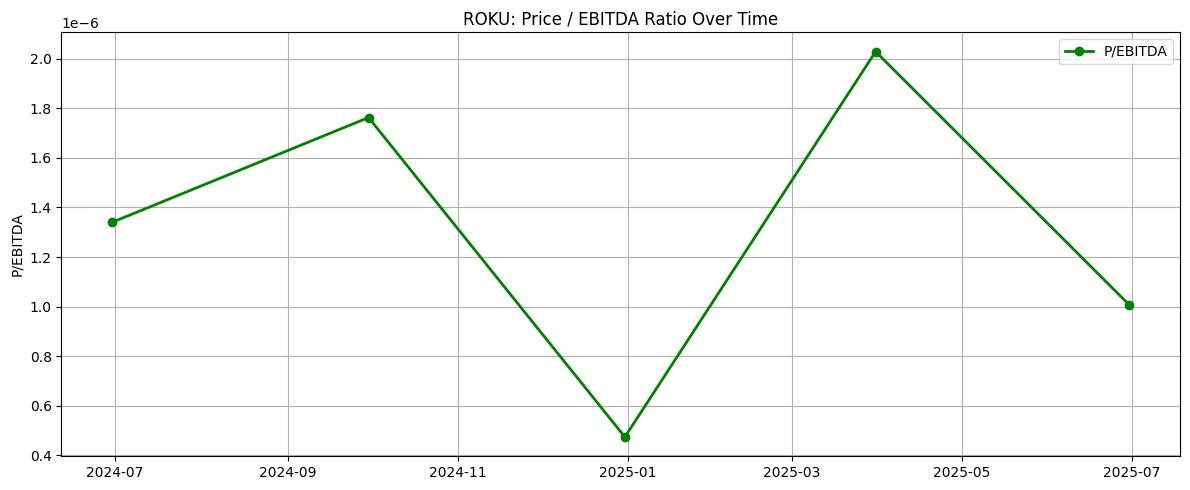

/tmp/ipython-input-1031692505.py:17: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  price = t.history(period='2y')['Close'].resample('Q').last()


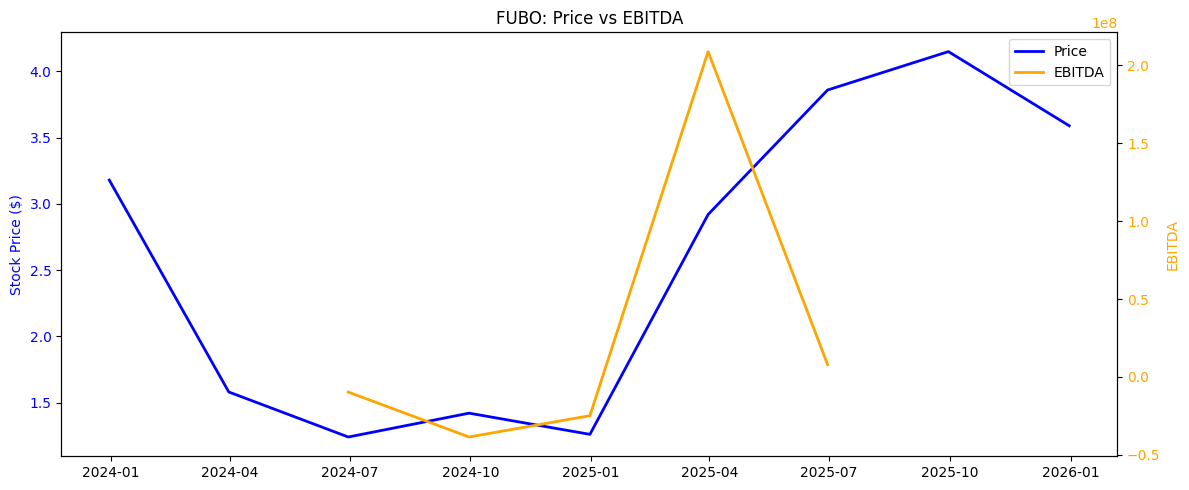

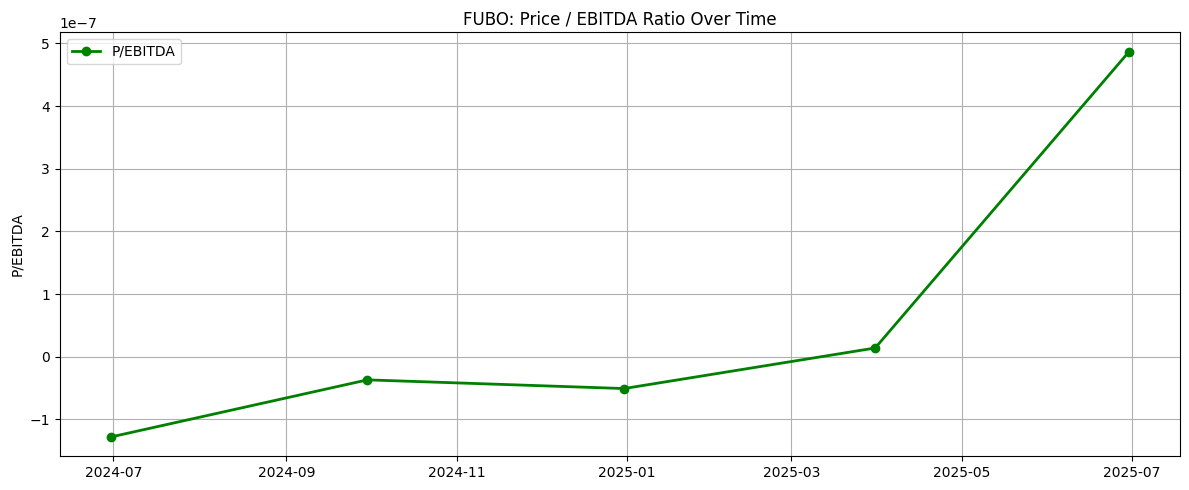

/tmp/ipython-input-1031692505.py:17: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  price = t.history(period='2y')['Close'].resample('Q').last()


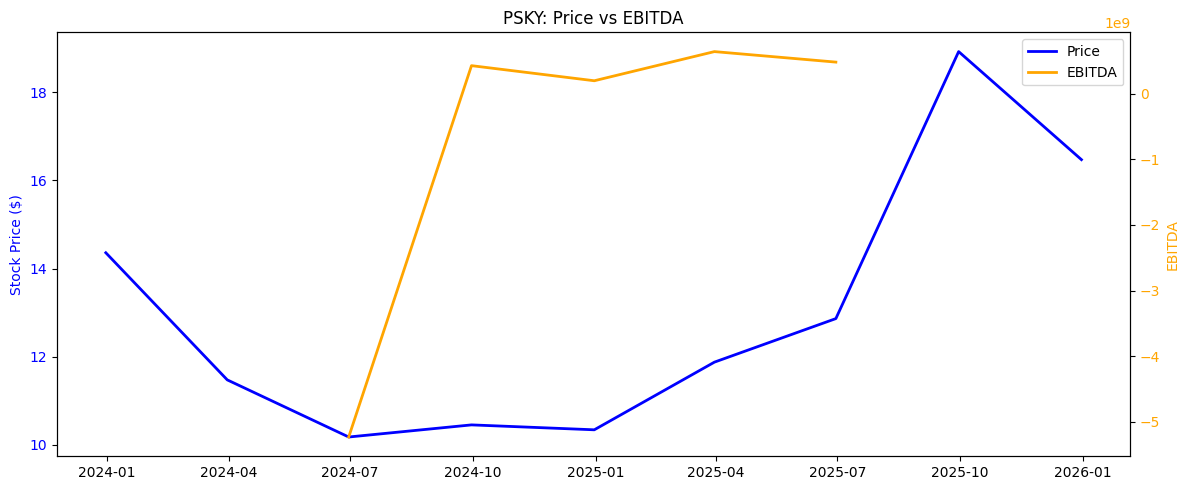

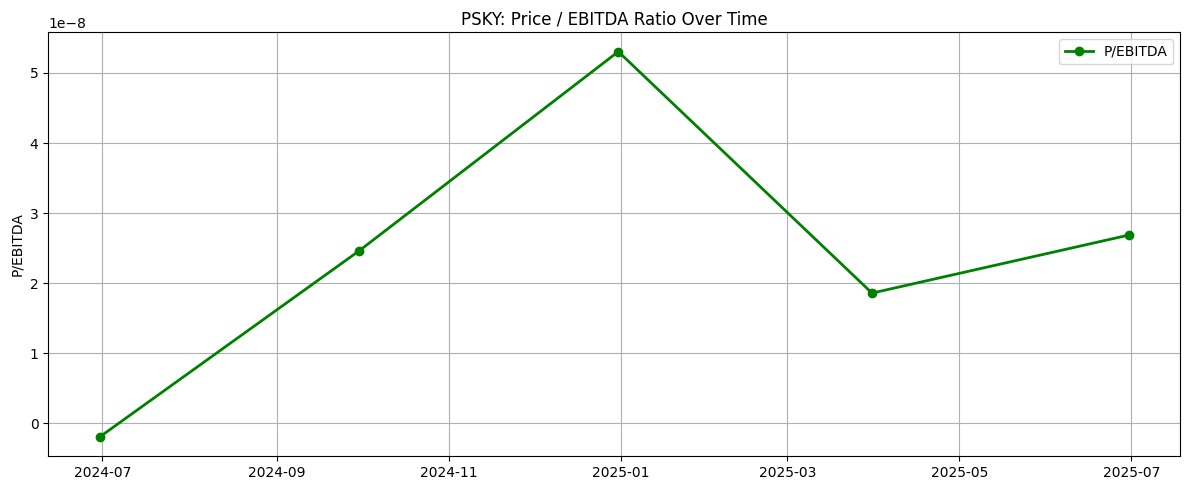

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

streaming_tickers = ['NFLX','DIS','CMCSA','ROKU','FUBO','PSKY']

for ticker in streaming_tickers:
    t = yf.Ticker(ticker)

    # Fundamentals (quarterly EBITDA)
    fin = t.quarterly_financials.T
    fin.index = pd.to_datetime(fin.index)
    metric = 'EBITDA'
    fundamentals = fin[metric]

    # Price (quarterly)
    price = t.history(period='2y')['Close'].resample('Q').last()

    # Normalize timezone
    price.index = price.index.tz_localize(None)
    fundamentals.index = fundamentals.index.tz_localize(None)

    # Overlay plot
    fig, ax1 = plt.subplots(figsize=(12, 5))

    # Plot price on primary y-axis
    ax1.plot(price.index, price.values, color='blue', linewidth=2, label='Price')
    ax1.set_ylabel('Stock Price ($)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Plot EBITDA on secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(fundamentals.index, fundamentals.values, color='orange', linewidth=2, label=metric)
    ax2.set_ylabel(metric, color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Add legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

    plt.title(f'{ticker}: Price vs {metric}')
    fig.tight_layout()
    plt.show()

    # Price / EBITDA ratio
    ratio = price / fundamentals
    plt.figure(figsize=(12, 5))
    plt.plot(ratio.index, ratio.values, marker='o', linewidth=2, color='green', label=f'P/{metric}')
    plt.title(f'{ticker}: Price / {metric} Ratio Over Time')
    plt.ylabel(f'P/{metric}')
    plt.grid(True)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


,Revenue (latest),Gross Margin %,Operating Margin %,Net Margin %,EBITDA Margin %,R&D / Revenue %
NFLX,"11,079,166,000",51.930000,34.070000,28.210000,69.740000,7.440000
DIS,"23,650,000,000",38.550000,15.410000,22.250000,21.060000,nan
CMCSA,"30,313,000,000",75.010000,19.770000,36.690000,65.670000,nan
ROKU,"1,111,038,000",44.790000,-2.100000,0.950000,7.850000,16.020000
FUBO,"379,968,000",20.450000,-1.580000,-2.110000,2.090000,5.070000
PSKY,"6,849,000,000",32.490000,10.760000,0.830000,6.990000,nan


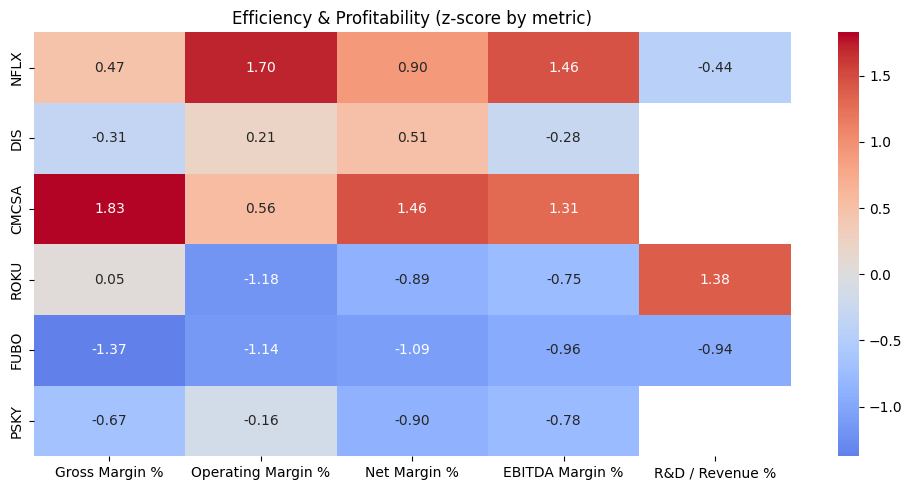

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

TICKERS = ['NFLX','DIS','CMCSA','ROKU','FUBO','PSKY']
REQ = ['Total Revenue','Gross Profit','Operating Income','Net Income','EBITDA','Research And Development']

def newest_quarter_row(t):
    qf = yf.Ticker(t).quarterly_financials
    fin = qf.T.copy()
    fin.index = pd.to_datetime(fin.index)
    fin = fin.sort_index(ascending=False)
    s = fin.iloc[0].reindex(REQ)
    s.name = t
    return s

#Build table
raw = pd.DataFrame([newest_quarter_row(t) for t in TICKERS])
R = raw['Total Revenue'].replace(0, np.nan)

bench = pd.DataFrame({
    'Revenue (latest)':R,
    'Gross Margin %': 100 * raw['Gross Profit']/R,
    'Operating Margin %':100 * raw['Operating Income']/R,
    'Net Margin %':100 * raw['Net Income']/R,
    'EBITDA Margin %':100 * raw['EBITDA']/R,
    'R&D / Revenue %'  : 100 * raw['Research And Development']/R,
}).round(2)

#Display table
display(bench.style.format({'Revenue (latest)': '{:,.0f}'}))

# Draw heatmap
metrics = bench.drop(columns='Revenue (latest)')
Z = (metrics - metrics.mean()) / metrics.std(ddof=0)

plt.figure(figsize=(10,5))
sns.heatmap(Z, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Efficiency & Profitability (z-score by metric)")
plt.tight_layout()
plt.show()


/tmp/ipython-input-4032695575.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  price = t.history(period='2y')['Close'].resample('Q').last()
/tmp/ipython-input-4032695575.py:26: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(price.index[-1], periods=future_steps+1, freq='Q')[1:]


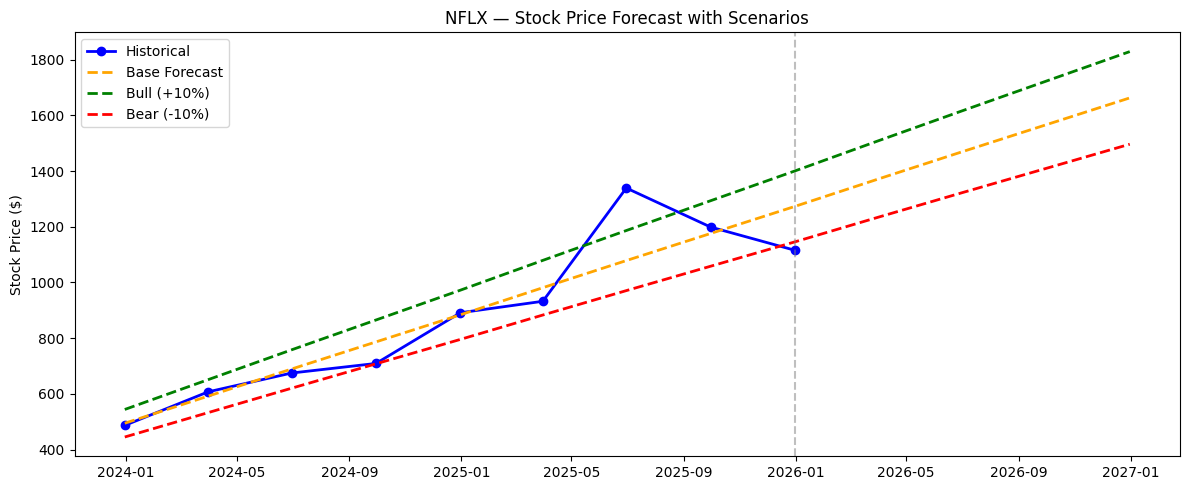

/tmp/ipython-input-4032695575.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  price = t.history(period='2y')['Close'].resample('Q').last()
/tmp/ipython-input-4032695575.py:26: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(price.index[-1], periods=future_steps+1, freq='Q')[1:]


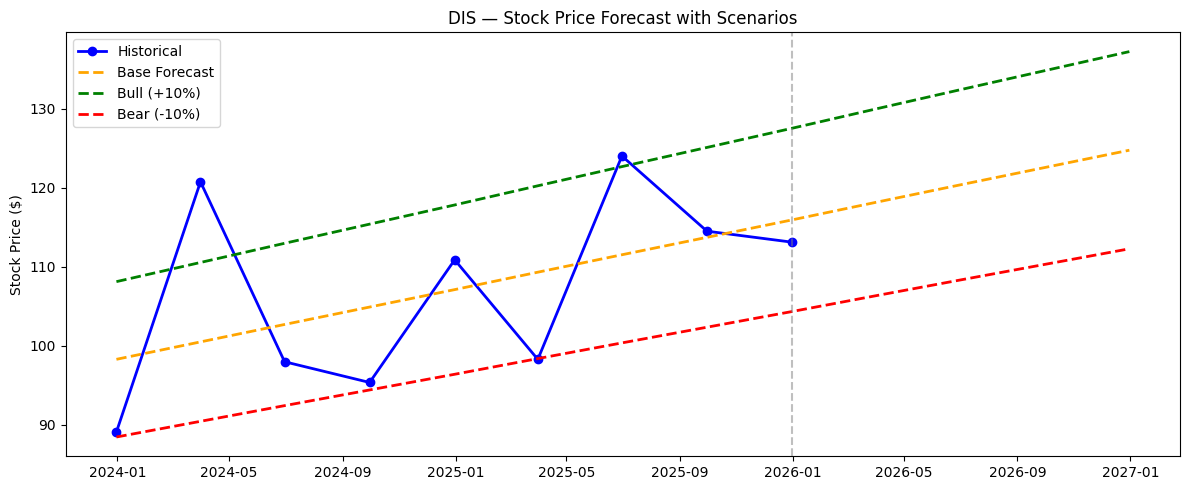

/tmp/ipython-input-4032695575.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  price = t.history(period='2y')['Close'].resample('Q').last()
/tmp/ipython-input-4032695575.py:26: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(price.index[-1], periods=future_steps+1, freq='Q')[1:]


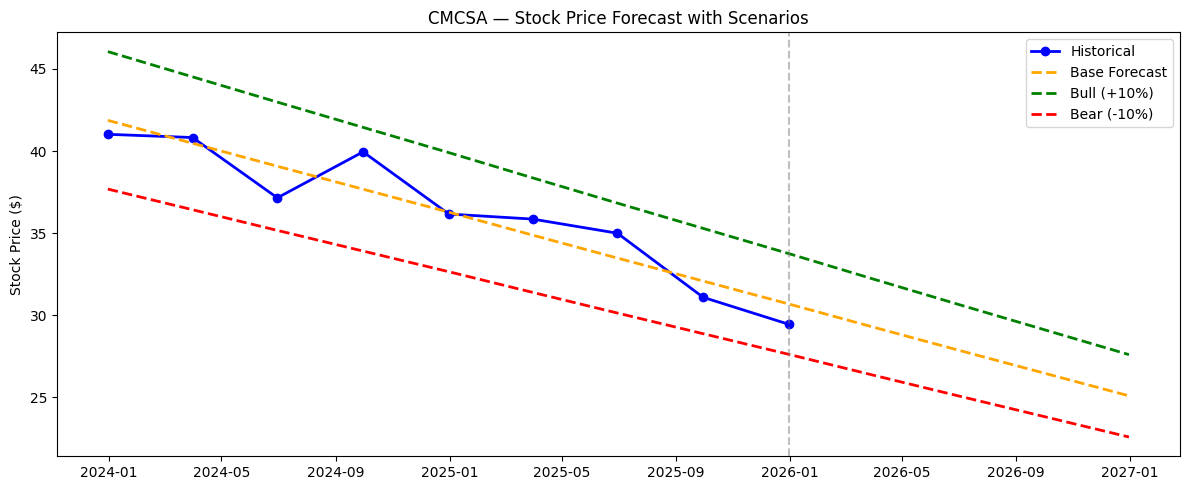

/tmp/ipython-input-4032695575.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  price = t.history(period='2y')['Close'].resample('Q').last()
/tmp/ipython-input-4032695575.py:26: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(price.index[-1], periods=future_steps+1, freq='Q')[1:]


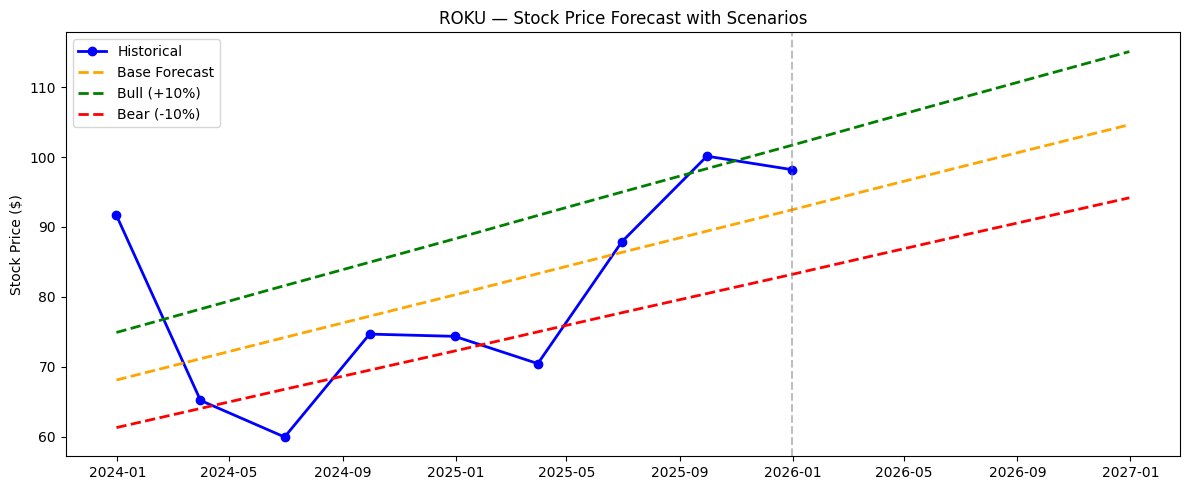

/tmp/ipython-input-4032695575.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  price = t.history(period='2y')['Close'].resample('Q').last()
/tmp/ipython-input-4032695575.py:26: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(price.index[-1], periods=future_steps+1, freq='Q')[1:]


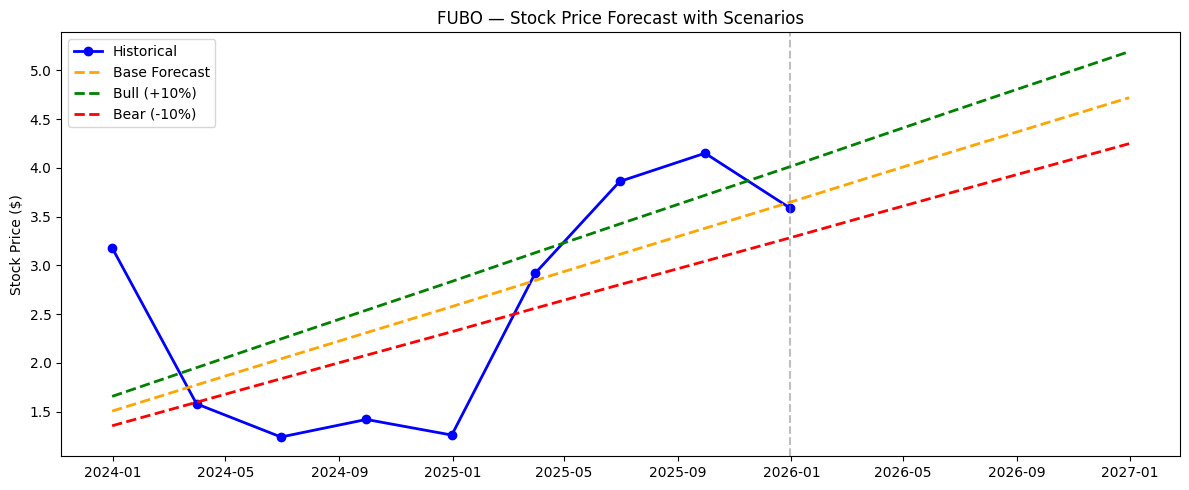

/tmp/ipython-input-4032695575.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  price = t.history(period='2y')['Close'].resample('Q').last()
/tmp/ipython-input-4032695575.py:26: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(price.index[-1], periods=future_steps+1, freq='Q')[1:]


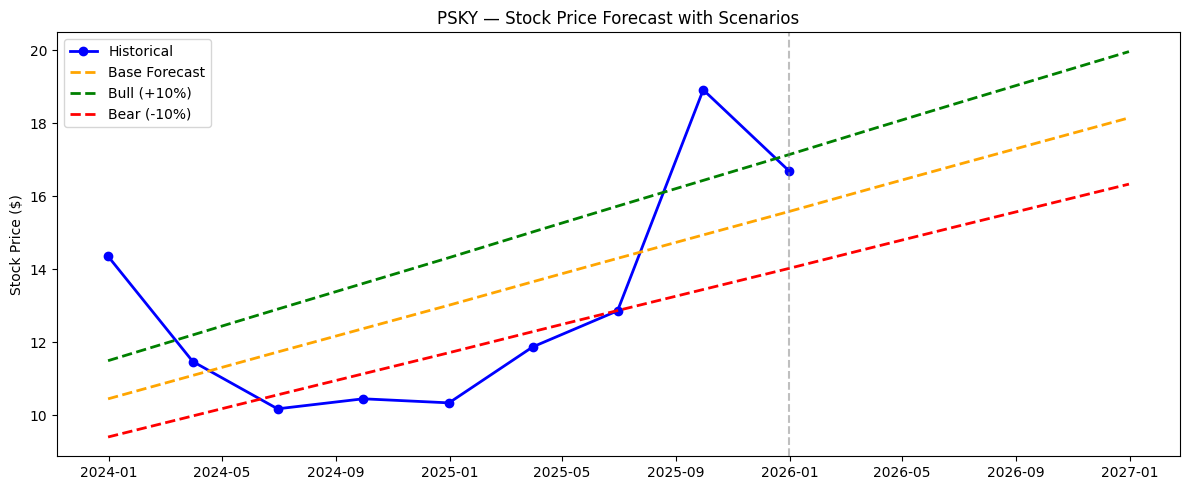

In [ ]:

from sklearn.linear_model import LinearRegression

streaming_tickers = ['NFLX','DIS','CMCSA','ROKU','FUBO','PSKY']
future_steps = 4  # number of quarters to project

for ticker in streaming_tickers:
    t = yf.Ticker(ticker)
    price = t.history(period='2y')['Close'].resample('Q').last()


    # Prepare linear regression
    X = np.arange(len(price)).reshape(-1, 1)
    y = price.values
    model = LinearRegression()
    model.fit(X, y)

    # Forecast next quarters
    X_future = np.arange(len(price) + future_steps).reshape(-1, 1)
    y_future = model.predict(X_future)

    # Create scenarios
    bull = y_future * 1.10   # +10% growth scenario
    bear = y_future * 0.90   # -10% growth scenario

    # Future dates
    future_dates = pd.date_range(price.index[-1], periods=future_steps+1, freq='Q')[1:]
    all_dates = np.concatenate([price.index, future_dates])

    # Plot
    plt.figure(figsize=(12,5))
    plt.plot(price.index, y, marker='o', color='blue', linewidth=2, label='Historical')
    plt.plot(all_dates, y_future, linestyle='--', color='orange', linewidth=2, label='Base Forecast')
    plt.plot(all_dates, bull, linestyle='--', color='green', linewidth=2, label='Bull (+10%)')
    plt.plot(all_dates, bear, linestyle='--', color='red', linewidth=2, label='Bear (-10%)')

    plt.axvline(price.index[-1], color='gray', linestyle='--', alpha=0.5)
    plt.title(f'{ticker} — Stock Price Forecast with Scenarios')
    plt.ylabel('Stock Price ($)')
    plt.legend()
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-3038237638.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fut_idx = pd.date_range(s.index[-1] + QuarterEnd(1), periods=steps, freq='Q')


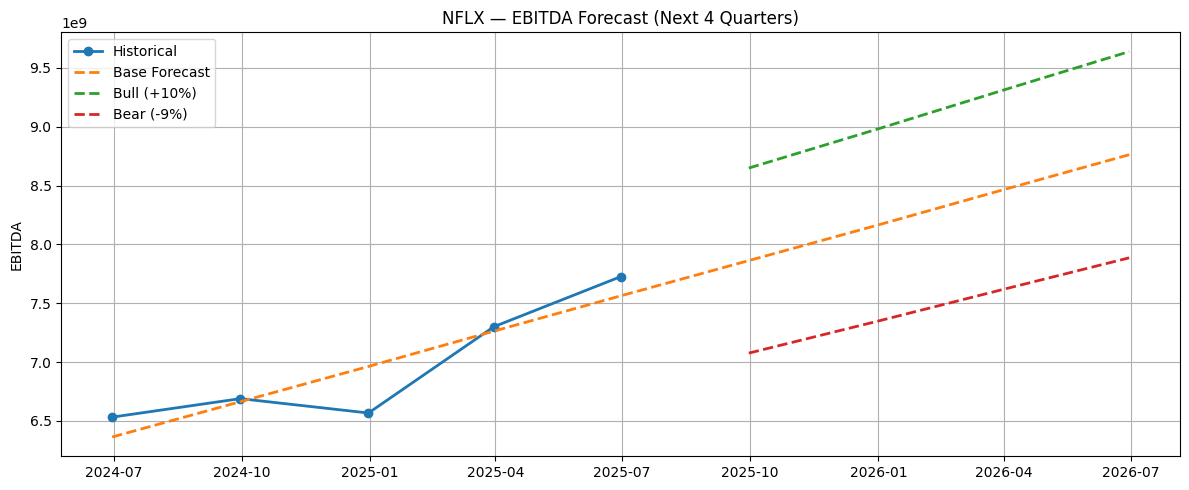

/tmp/ipython-input-3038237638.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fut_idx = pd.date_range(s.index[-1] + QuarterEnd(1), periods=steps, freq='Q')


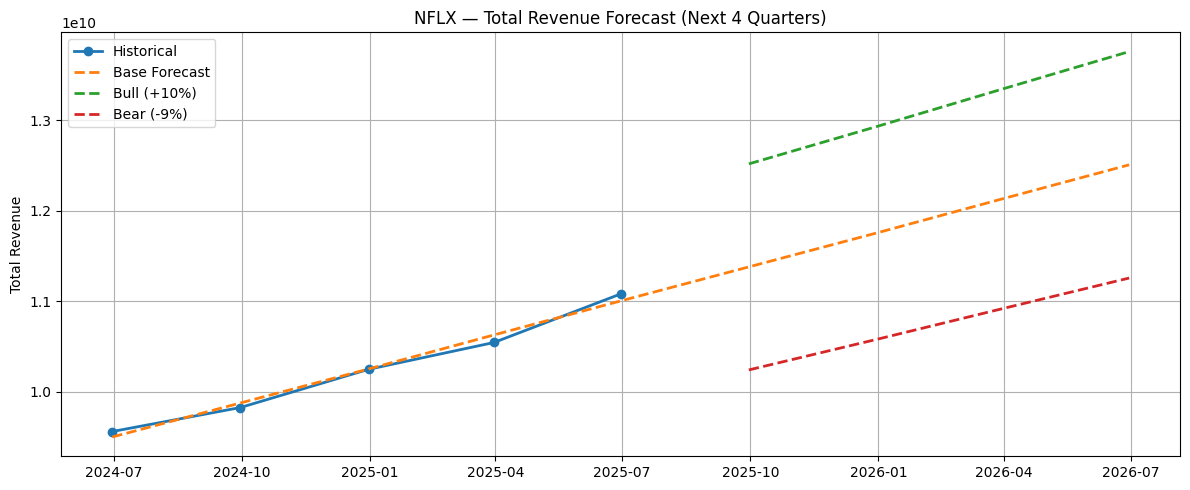

/tmp/ipython-input-3038237638.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fut_idx = pd.date_range(s.index[-1] + QuarterEnd(1), periods=steps, freq='Q')


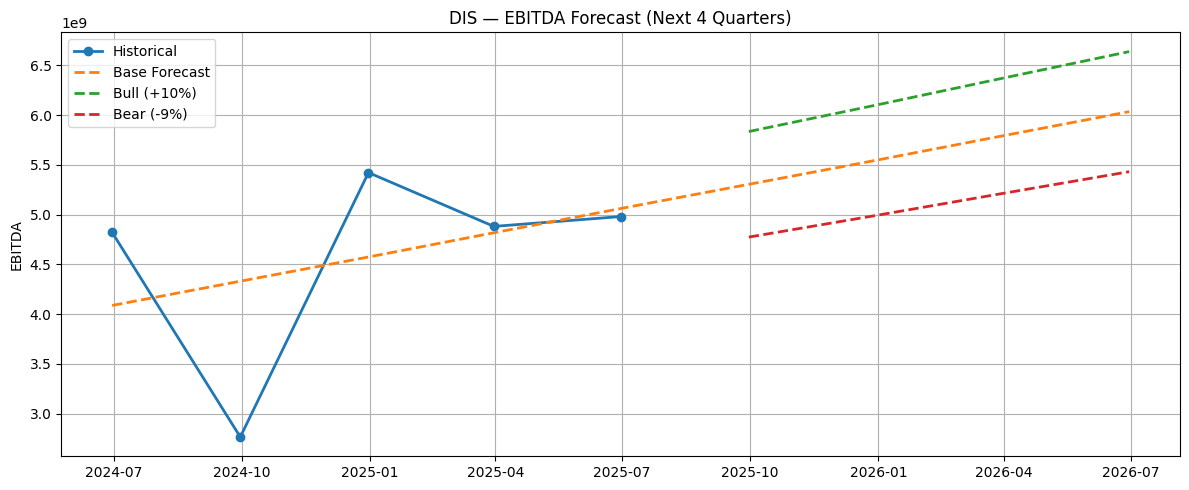

/tmp/ipython-input-3038237638.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fut_idx = pd.date_range(s.index[-1] + QuarterEnd(1), periods=steps, freq='Q')


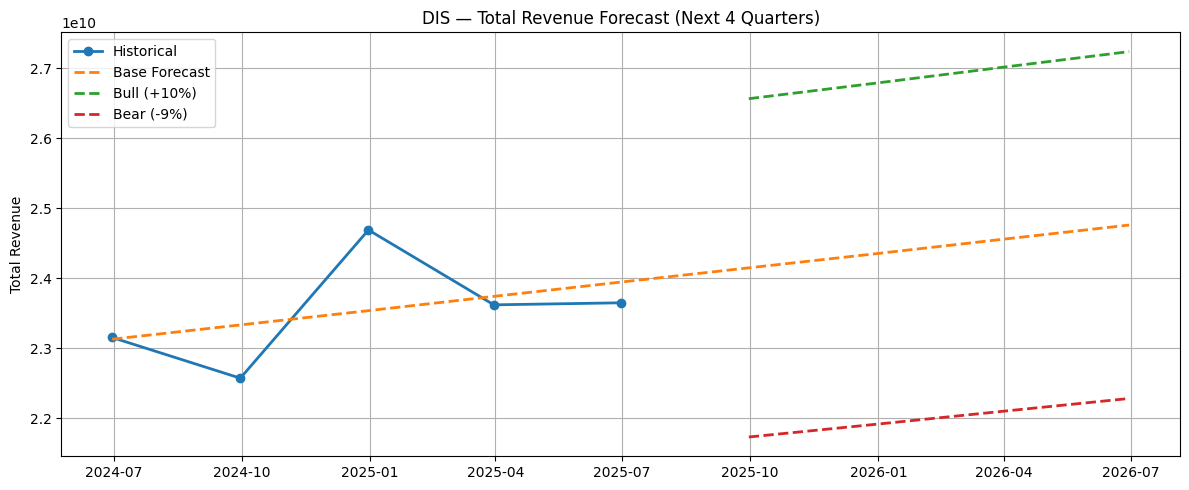

/tmp/ipython-input-3038237638.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fut_idx = pd.date_range(s.index[-1] + QuarterEnd(1), periods=steps, freq='Q')


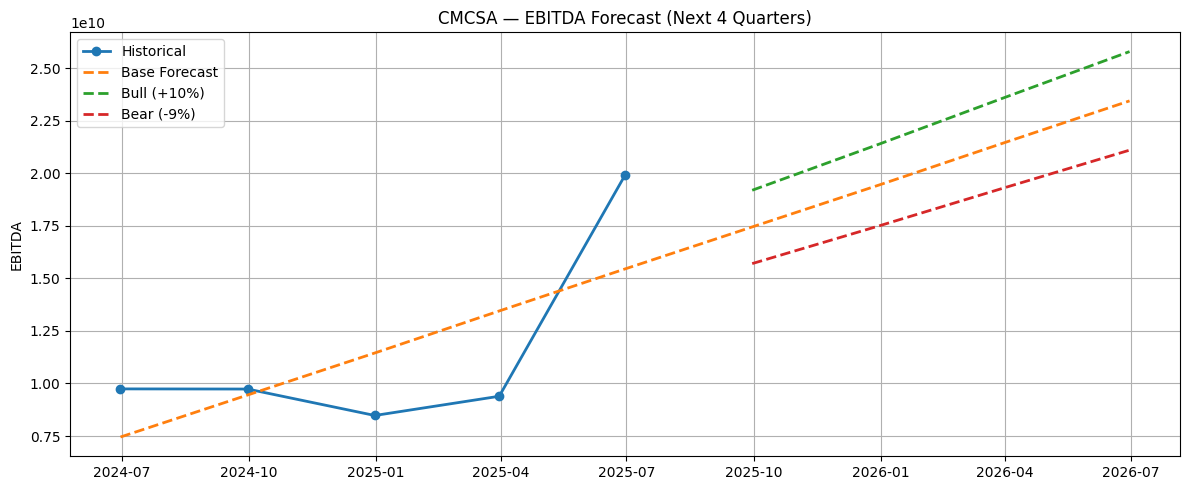

/tmp/ipython-input-3038237638.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fut_idx = pd.date_range(s.index[-1] + QuarterEnd(1), periods=steps, freq='Q')


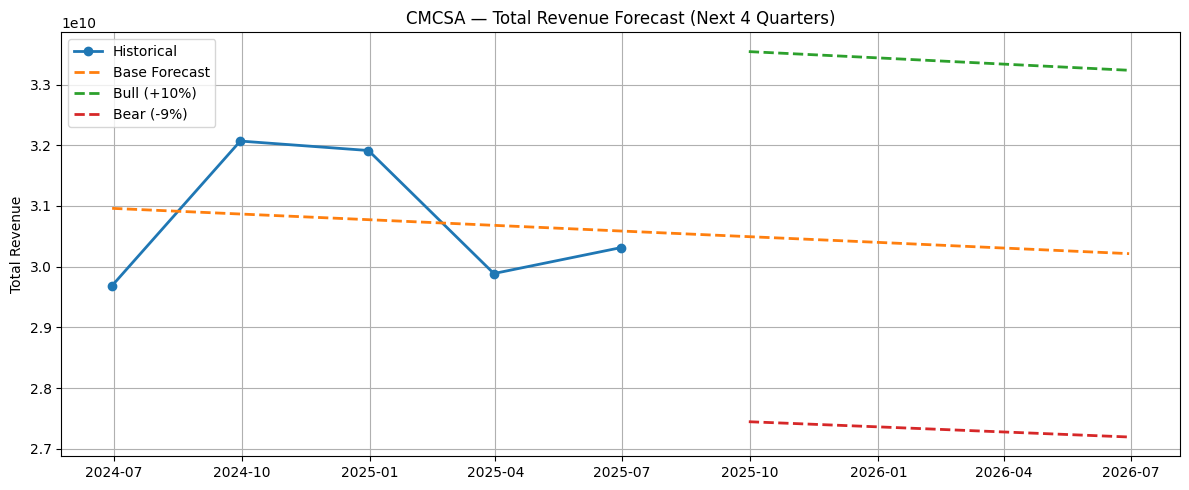

/tmp/ipython-input-3038237638.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fut_idx = pd.date_range(s.index[-1] + QuarterEnd(1), periods=steps, freq='Q')


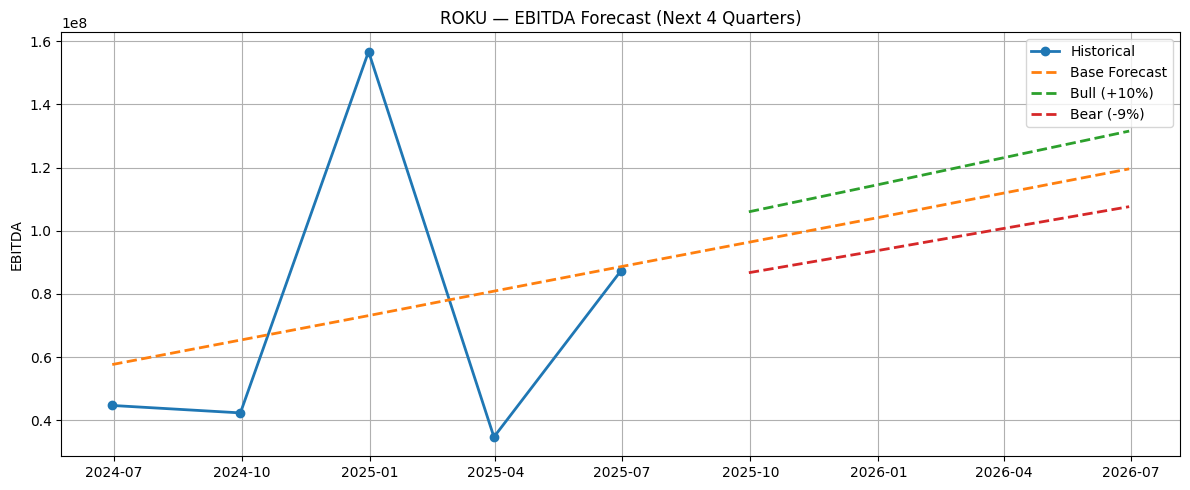

/tmp/ipython-input-3038237638.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fut_idx = pd.date_range(s.index[-1] + QuarterEnd(1), periods=steps, freq='Q')


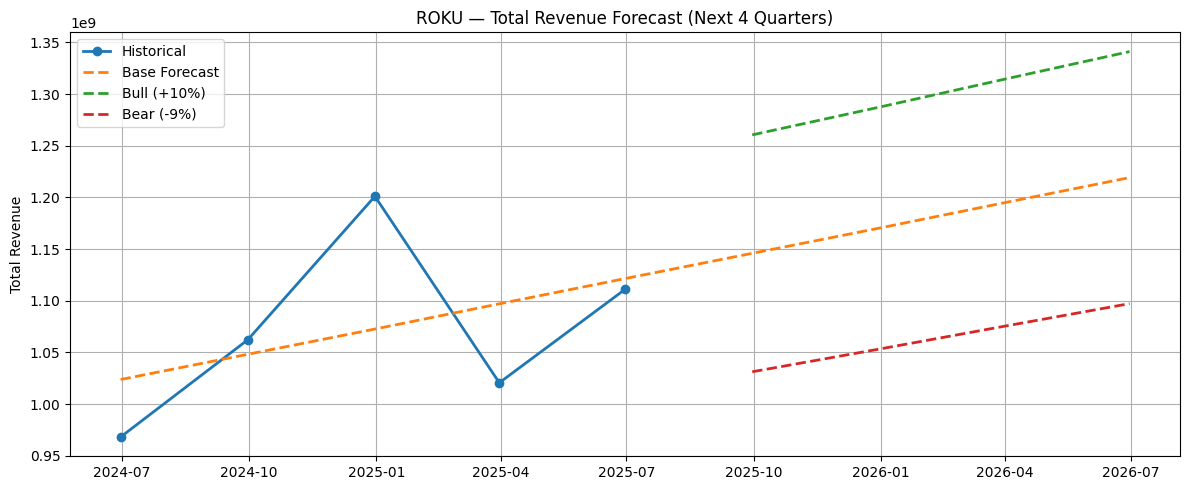

/tmp/ipython-input-3038237638.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fut_idx = pd.date_range(s.index[-1] + QuarterEnd(1), periods=steps, freq='Q')


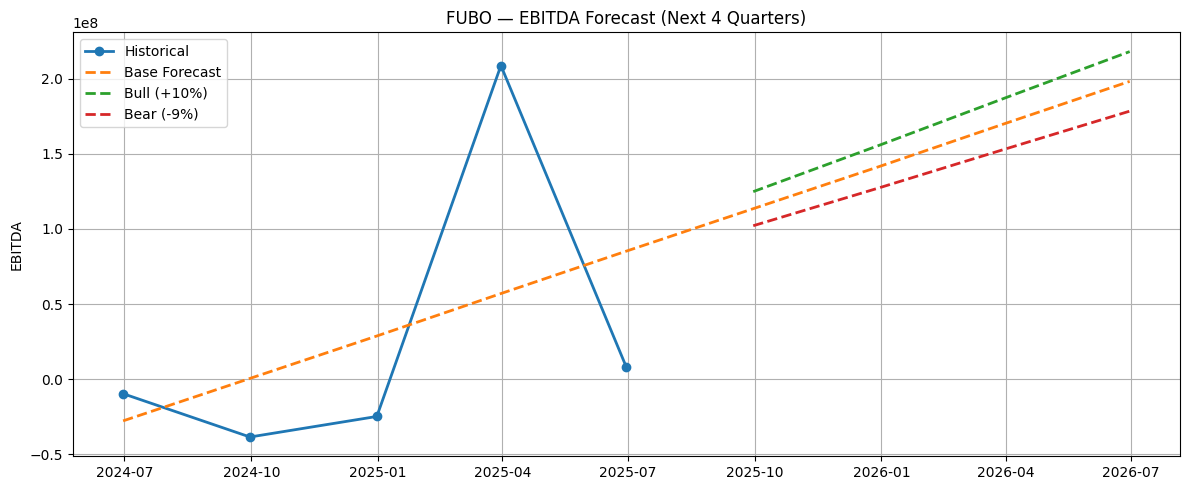

/tmp/ipython-input-3038237638.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fut_idx = pd.date_range(s.index[-1] + QuarterEnd(1), periods=steps, freq='Q')


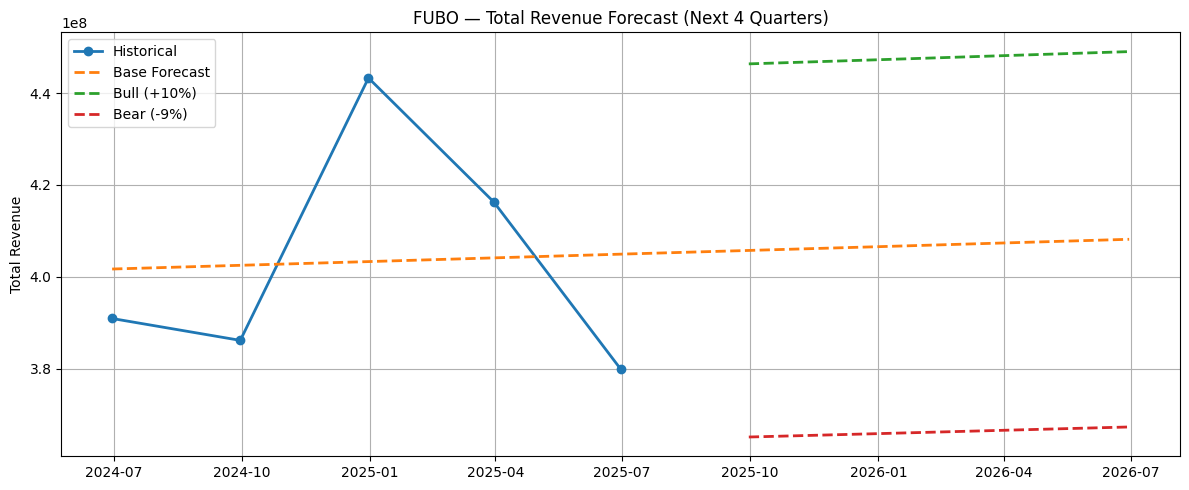

/tmp/ipython-input-3038237638.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fut_idx = pd.date_range(s.index[-1] + QuarterEnd(1), periods=steps, freq='Q')


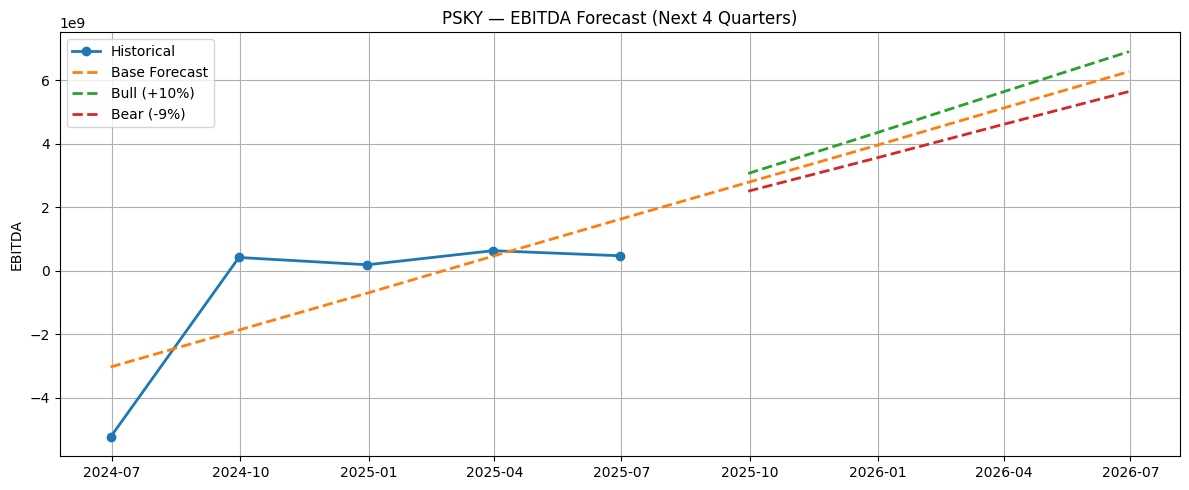

/tmp/ipython-input-3038237638.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fut_idx = pd.date_range(s.index[-1] + QuarterEnd(1), periods=steps, freq='Q')


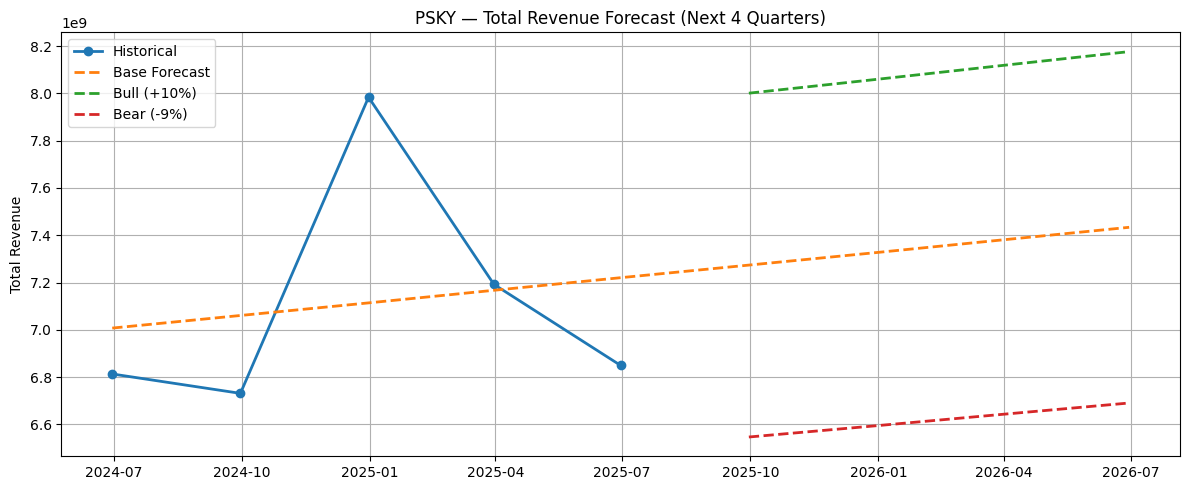

In [ ]:
import numpy as np, pandas as pd, yfinance as yf
import matplotlib.pyplot as plt
from pandas.tseries.offsets import QuarterEnd

TICKERS = ['NFLX','DIS','CMCSA','ROKU','FUBO','PSKY']
METRICS = ['EBITDA', 'Total Revenue']
# future quarters
STEPS   = 4
# +/-10% scenarios
BULL, BEAR = 1.10, 0.90

def forecast_and_plot(ticker, metric, steps=STEPS, bull=BULL, bear=BEAR):
    qf = yf.Ticker(ticker).quarterly_financials
    s = qf.loc[metric].T
    s.index = pd.to_datetime(s.index)
    s = s.sort_index().dropna()

    # linear trend via numpy
    x = np.arange(len(s), dtype=float)
    a, b = np.polyfit(x, s.values.astype(float), 1)
    x_full = np.arange(len(s)+steps, dtype=float)
    y_full = a*x_full + b

    # future quarter ends start at next quarter
    fut_idx = pd.date_range(s.index[-1] + QuarterEnd(1), periods=steps, freq='Q')
    all_idx = s.index.append(fut_idx)
    fut_base = y_full[len(s):]

    plt.figure(figsize=(12,5))
    plt.plot(s.index, s.values, marker='o', lw=2, label='Historical')
    plt.plot(all_idx, y_full, ls='--', lw=2, label='Base Forecast')
    plt.plot(fut_idx, fut_base*bull, ls='--', lw=2, label=f'Bull (+{int((bull-1)*100)}%)')
    plt.plot(fut_idx, fut_base*bear, ls='--', lw=2, label=f'Bear (-{int((1-bear)*100)}%)')
    plt.title(f"{ticker} — {metric} Forecast (Next {steps} Quarters)")
    plt.ylabel(metric); plt.legend(); plt.tight_layout()
    plt.grid(True)
    plt.show()

# tiny runner
for tk in TICKERS:
    for m in METRICS:
        forecast_and_plot(tk, m)


/tmp/ipython-input-2477426116.py:43: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fut_idx = pd.date_range(s.index[-1] + QuarterEnd(1), periods=steps, freq='Q')


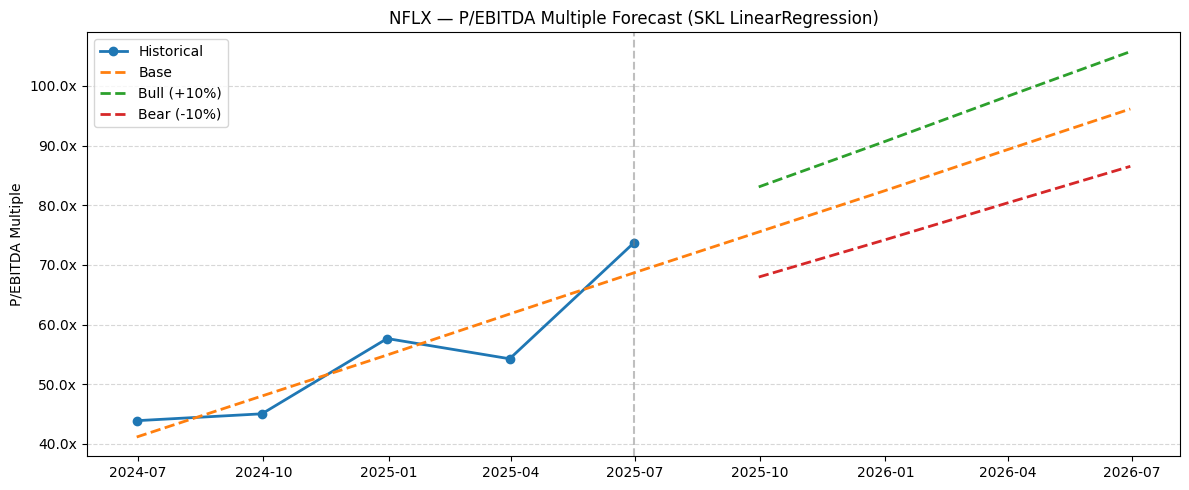

/tmp/ipython-input-2477426116.py:43: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fut_idx = pd.date_range(s.index[-1] + QuarterEnd(1), periods=steps, freq='Q')


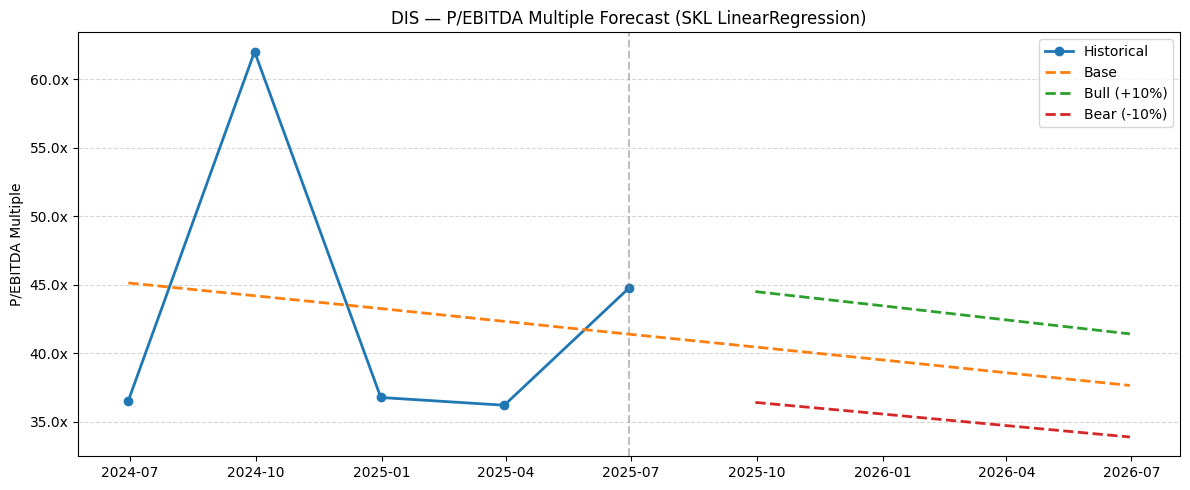

/tmp/ipython-input-2477426116.py:43: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fut_idx = pd.date_range(s.index[-1] + QuarterEnd(1), periods=steps, freq='Q')


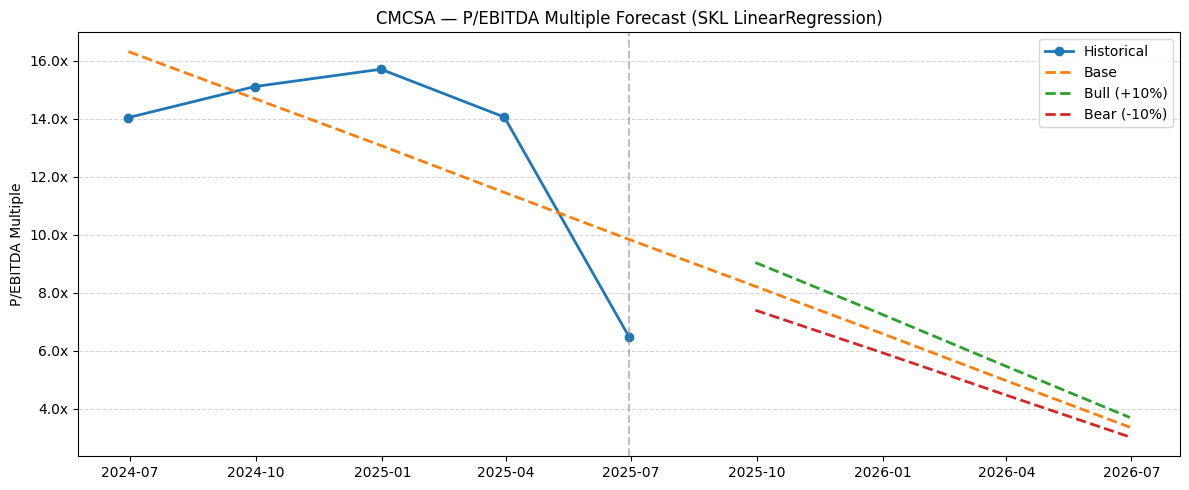

/tmp/ipython-input-2477426116.py:43: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fut_idx = pd.date_range(s.index[-1] + QuarterEnd(1), periods=steps, freq='Q')


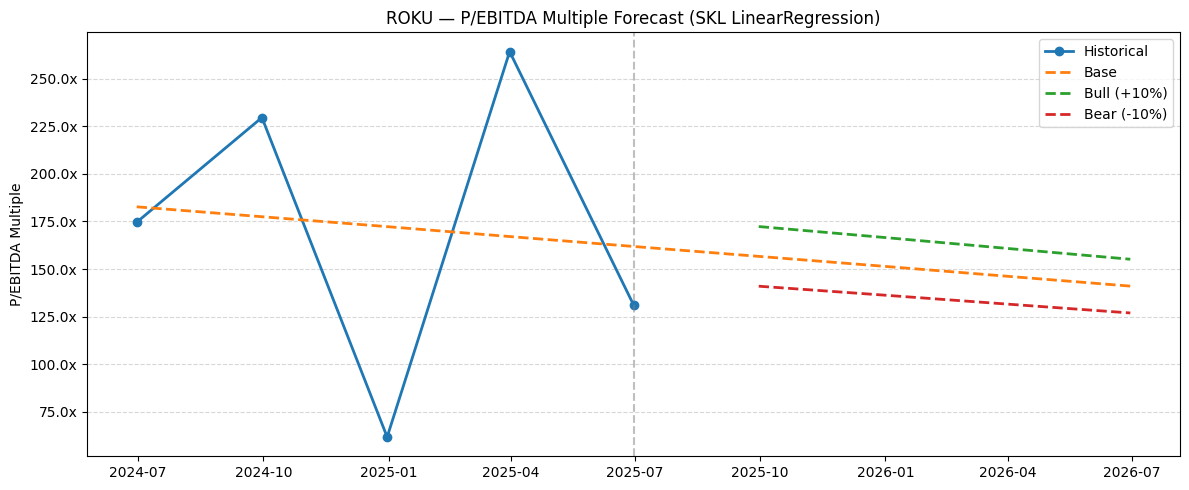

/tmp/ipython-input-2477426116.py:43: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fut_idx = pd.date_range(s.index[-1] + QuarterEnd(1), periods=steps, freq='Q')


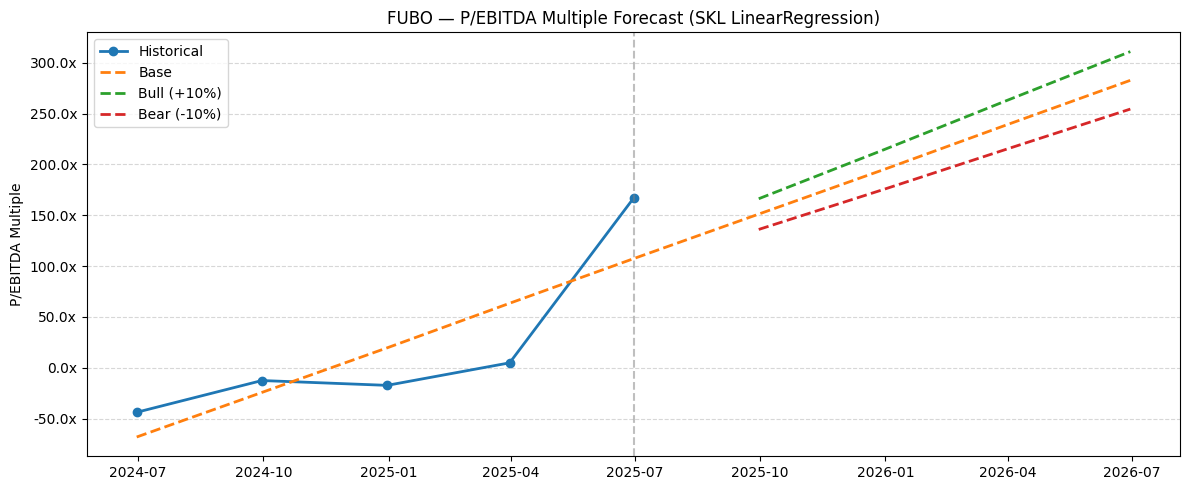

/tmp/ipython-input-2477426116.py:43: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fut_idx = pd.date_range(s.index[-1] + QuarterEnd(1), periods=steps, freq='Q')


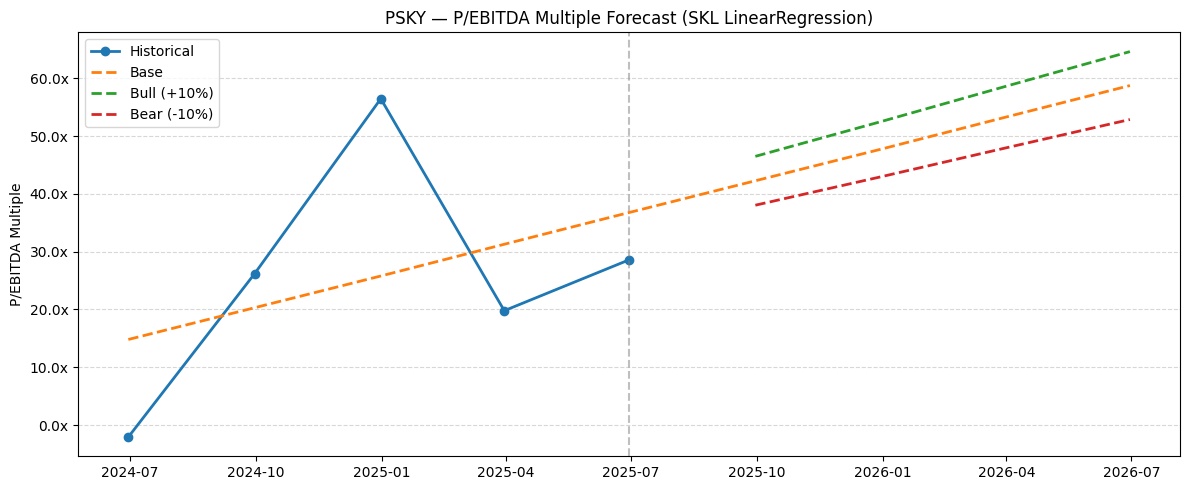

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from pandas.tseries.offsets import QuarterEnd
from sklearn.linear_model import LinearRegression

TICKERS = ['NFLX','DIS','CMCSA','ROKU','FUBO','PSKY']
STEPS   = 4  # forecast quarters

# Formatting helper function
def format_multiple(x, pos):
    return f"{x:,.1f}x"

fmt_mult = FuncFormatter(format_multiple)

# Helper functions

#helps fetching market capitalization series
def qe_market_cap(tk):
    t = yf.Ticker(tk)
    sh = t.info.get('sharesOutstanding')
    px = t.history(period='2y')['Close'].resample('QE').last()
    px = px.tz_localize(None)
    return (px * sh).sort_index()

#Fetch quarterly EBITDA series for the given ticke
def qe_ebitda(tk):
    qf = yf.Ticker(tk).quarterly_financials
    s = qf.loc['EBITDA'].T
    s.index = pd.to_datetime(s.index).tz_localize(None)
    return s.sort_index()

#Fit a linear regression model on the historical P/EBITDA series and extend the trend into the future
def skl_fit_predict(series, steps):
    s = series.dropna().sort_index()
    X = np.arange(len(s)).reshape(-1,1)
    y = s.values.astype(float)
    m = LinearRegression().fit(X, y)
    X_all = np.arange(len(s)+steps).reshape(-1,1)
    y_all = m.predict(X_all)
    fut_idx = pd.date_range(s.index[-1] + QuarterEnd(1), periods=steps, freq='Q')
    all_idx = s.index.append(fut_idx)
    return s, pd.Series(y_all, index=all_idx), fut_idx

# Loop through each ticker, build historical P/EBITDA multiple, forecast, and plot
for tk in TICKERS:
    mc = qe_market_cap(tk)
    e  = qe_ebitda(tk)
    # Historical P/EBITDA multiple
    mc_a, e_a = mc.align(e, join='inner')
    mult_hist = (mc_a / e_a).dropna()
    out = skl_fit_predict(mult_hist, STEPS)
    hist, base_all, fut_idx = out

    # Bull & bear scenarios
    base_future = base_all.loc[fut_idx]
    bull_future = base_future * 1.10
    bear_future = base_future * 0.90

    # Plot
    plt.figure(figsize=(12,5))
    plt.plot(hist.index, hist.values, marker='o', lw=2, label='Historical')
    plt.axvline(hist.index[-1], ls='--', color='gray', alpha=0.5)
    plt.plot(base_all.index, base_all.values, ls='--', lw=2, label='Base')
    plt.plot(fut_idx, bull_future.values, ls='--', lw=2, label='Bull (+10%)')
    plt.plot(fut_idx, bear_future.values, ls='--', lw=2, label='Bear (-10%)')

    plt.title(f"{tk} — P/EBITDA Multiple Forecast (SKL LinearRegression)")
    plt.ylabel("P/EBITDA Multiple")
    plt.gca().yaxis.set_major_formatter(fmt_mult)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
#Compare IMDb ratings of each streaming service
#Website to scrape
url = 'https://www.self.inc/info/which-tv-streaming-service-best-value-for-money/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')


In [ ]:
tables = soup.find_all('table')
tables_data = []

for table in tables:
    rows = table.find_all('tr')
    table_data = []
    for row in rows:
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        table_data.append(cols)
    tables_data.append(table_data)
#data contains all tables found in website
df_data = tables_data[7]

header = ['Score', 'Netflix', 'Prime Video', 'Disney+', 'HBO Max', 'Hulu', 'Hulu on Disney+', 'Apple TV +', 'Paramount +', 'Peacock']
rating_df2025 = pd.DataFrame(df_data[2:], columns=header)
#Manually fix display errors
prefix_list = ['Score', 'Netflix', 'Prime Video', 'Disney+', 'HBO Max', 'Hulu', 'Hulu on Disney+', 'Apple TV +', 'Paramount +', 'Peacock']
for col in prefix_list:
    rating_df2025[col] = rating_df2025[col].str.replace(col, '')

rating_df2025['Score'] = rating_df2025['Score'].str.replace('Row Labels', '')

prefix_list = [ 'Netflix', 'Prime Video', 'Disney+', 'HBO Max', 'Hulu', 'Hulu on Disney+', 'Apple TV +', 'Paramount +', 'Peacock']
for col in prefix_list:
    rating_df2025[col] = rating_df2025[col].str.replace(col, '').astype(float)

rating_df2025.set_index('Score', inplace=True)
#Create a copy to make another df with normalized value
rating_df2025_normal = rating_df2025.copy()
rating_df2025



,Netflix,Prime Video,Disney+,HBO Max,Hulu,Hulu on Disney+,Apple TV +,Paramount +,Peacock
Score,,,,,,,,,
Excellent 8+,403.0,1035.0,141.0,158.0,148.0,289.0,61.0,49.0,113.0
Good 6- 7.99,3921.0,9936.0,1284.0,1156.0,1029.0,2313.0,253.0,397.0,1461.0
OK 4-5.99,1771.0,8215.0,435.0,305.0,541.0,976.0,37.0,184.0,1011.0
Poor <4,202.0,2263.0,39.0,34.0,70.0,109.0,10.0,35.0,225.0
Grand Total,7367.0,25349.0,2327.0,2058.0,2343.0,4670.0,378.0,861.0,3285.0


In [ ]:
for col in prefix_list:
    rating_df2025_normal[col] = rating_df2025_normal[col].div(rating_df2025_normal[col].iloc[4])
#Normalized df
rating_df2025_normal


,Netflix,Prime Video,Disney+,HBO Max,Hulu,Hulu on Disney+,Apple TV +,Paramount +,Peacock
Score,,,,,,,,,
Excellent 8+,0.054703,0.040830,0.060593,0.076774,0.063167,0.061884,0.161376,0.056911,0.034399
Good 6- 7.99,0.532238,0.391968,0.551783,0.561710,0.439181,0.495289,0.669312,0.461092,0.444749
OK 4-5.99,0.240396,0.324076,0.186936,0.148202,0.230901,0.208994,0.097884,0.213705,0.307763
Poor <4,0.027420,0.089274,0.016760,0.016521,0.029876,0.023340,0.026455,0.040650,0.068493
Grand Total,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
### Same data but for 2024, similar process
df_data = tables_data[6]

header = ['Score', 'Netflix', 'Prime Video', 'Disney +', 'HBO Max', 'Hulu', 'Hulu on Disney+', 'Apple TV+', 'Paramount+', 'Peacock']
rating_df2024 = pd.DataFrame(df_data[2:], columns=header)

prefix_list = ['Score', 'Netflix', 'Prime Video', 'Disney +', 'HBO Max', 'Hulu', 'Hulu on Disney+', 'Apple TV+', 'Paramount+', 'Peacock']
for col in prefix_list:
    rating_df2024[col] = rating_df2024[col].str.replace(col, '')

rating_df2024


prefix_list = [ 'Netflix', 'Prime Video', 'Disney +', 'HBO Max', 'Hulu', 'Hulu on Disney+', 'Apple TV+', 'Paramount+', 'Peacock']
for col in prefix_list:
    rating_df2024[col] = rating_df2024[col].str.replace(col, '').astype(float)

rating_df2024.set_index('Score', inplace=True)
rating_df2024_normal = rating_df2024.copy()
rating_df2024



,Netflix,Prime Video,Disney +,HBO Max,Hulu,Hulu on Disney+,Apple TV+,Paramount+,Peacock
Score,,,,,,,,,
Excellent 8+,568.0,817.0,157.0,499.0,496.0,653.0,58.0,191.0,226.0
Good 6-7.99,4127.0,6309.0,1230.0,2345.0,2241.0,3471.0,187.0,1120.0,1950.0
OK 4-5.99,1621.0,5471.0,413.0,525.0,1118.0,1531.0,24.0,468.0,1442.0
Poor <4,155.0,1230.0,20.0,38.0,191.0,211.0,2.0,63.0,278.0
TOTAL,6471.0,13827.0,1820.0,3407.0,4046.0,5866.0,271.0,1842.0,3896.0


In [ ]:
### Normalized data
for col in prefix_list:
    rating_df2024_normal[col] = rating_df2024_normal[col].div(rating_df2024_normal[col].iloc[4])

rating_df2024_normal


,Netflix,Prime Video,Disney +,HBO Max,Hulu,Hulu on Disney+,Apple TV+,Paramount+,Peacock
Score,,,,,,,,,
Excellent 8+,0.087776,0.059087,0.086264,0.146463,0.122590,0.111319,0.214022,0.103692,0.058008
Good 6-7.99,0.637769,0.456281,0.675824,0.688289,0.553880,0.591715,0.690037,0.608035,0.500513
OK 4-5.99,0.250502,0.395675,0.226923,0.154095,0.276322,0.260996,0.088561,0.254072,0.370123
Poor <4,0.023953,0.088956,0.010989,0.011154,0.047207,0.035970,0.007380,0.034202,0.071355
TOTAL,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

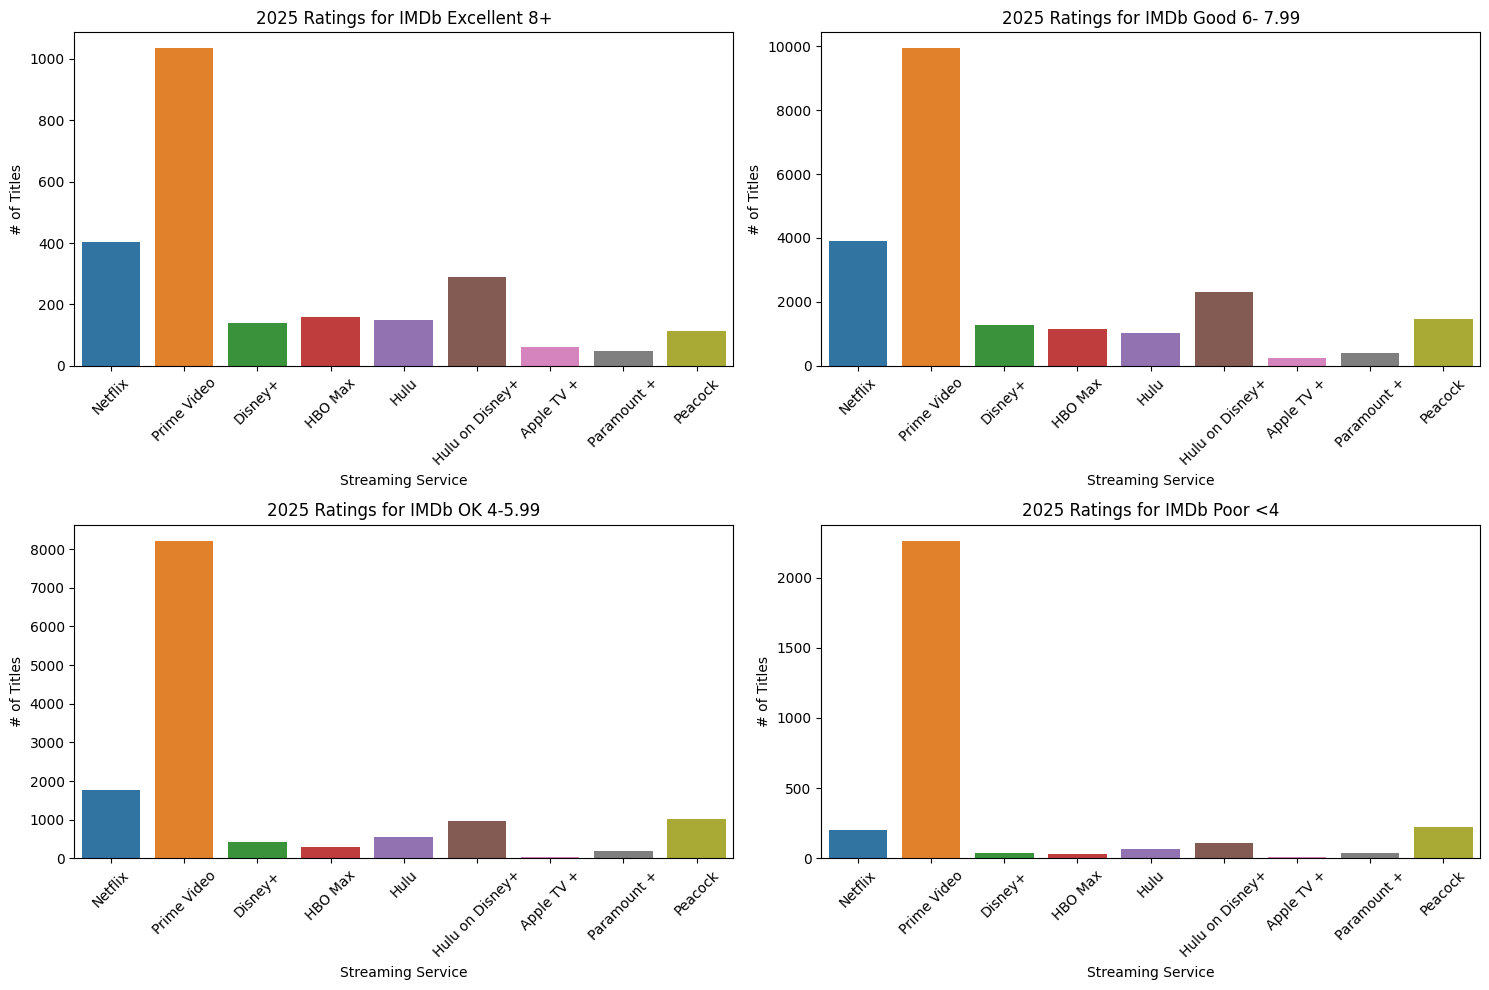

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

###Plot each category of ratings for each streaming service

for i in range(4):
  row = i // 2
  col = i % 2
  sns.barplot(x = rating_df2025.columns[:], y = rating_df2025.iloc[i][:], ax = axs[row, col], hue = rating_df2025.columns[:], legend = False)
  axs[row, col].tick_params(axis = 'x', rotation=45)
  axs[row, col].set_xlabel("Streaming Service")
  axs[row, col].set_ylabel("# of Titles")
  axs[row, col].set_title(f"2025 Ratings for IMDb{rating_df2025.index[i]}")

plt.tight_layout()
plt.show()

### Prime Video clearly has the most in all categories



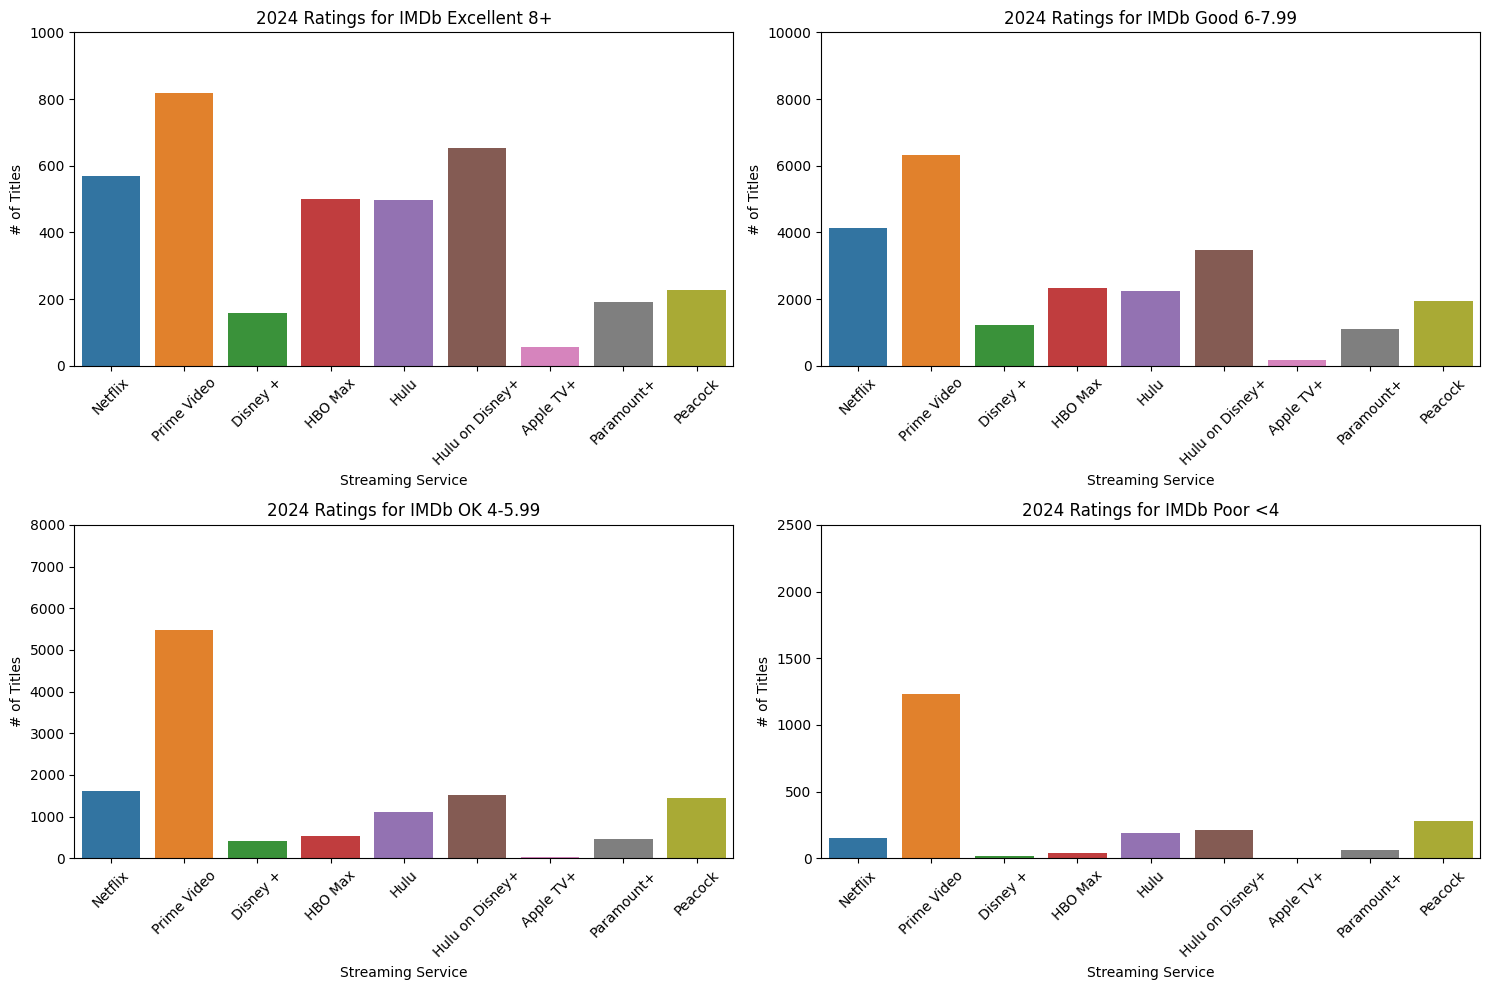

In [ ]:
### How was it different in 2024?

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i in range(4):
  row = i // 2
  col = i % 2
  sns.barplot(x = rating_df2024.columns[:], y = rating_df2024.iloc[i][:], ax = axs[row, col], hue = rating_df2025.columns[:], legend = False)
  axs[row, col].tick_params(axis = 'x', rotation=45)
  axs[row, col].set_xlabel("Streaming Service")
  axs[row, col].set_ylabel("# of Titles")
  axs[row, col].set_title(f"2024 Ratings for IMDb{rating_df2024.index[i]}")
axs[0,0].set_ylim(0,1000)
axs[0,1].set_ylim(0,10000)
axs[1,0].set_ylim(0,8000)
axs[1,1].set_ylim(0,2500)
plt.tight_layout()
plt.show()

### Prime has increased significantly in its top categories while Netflix has decreased



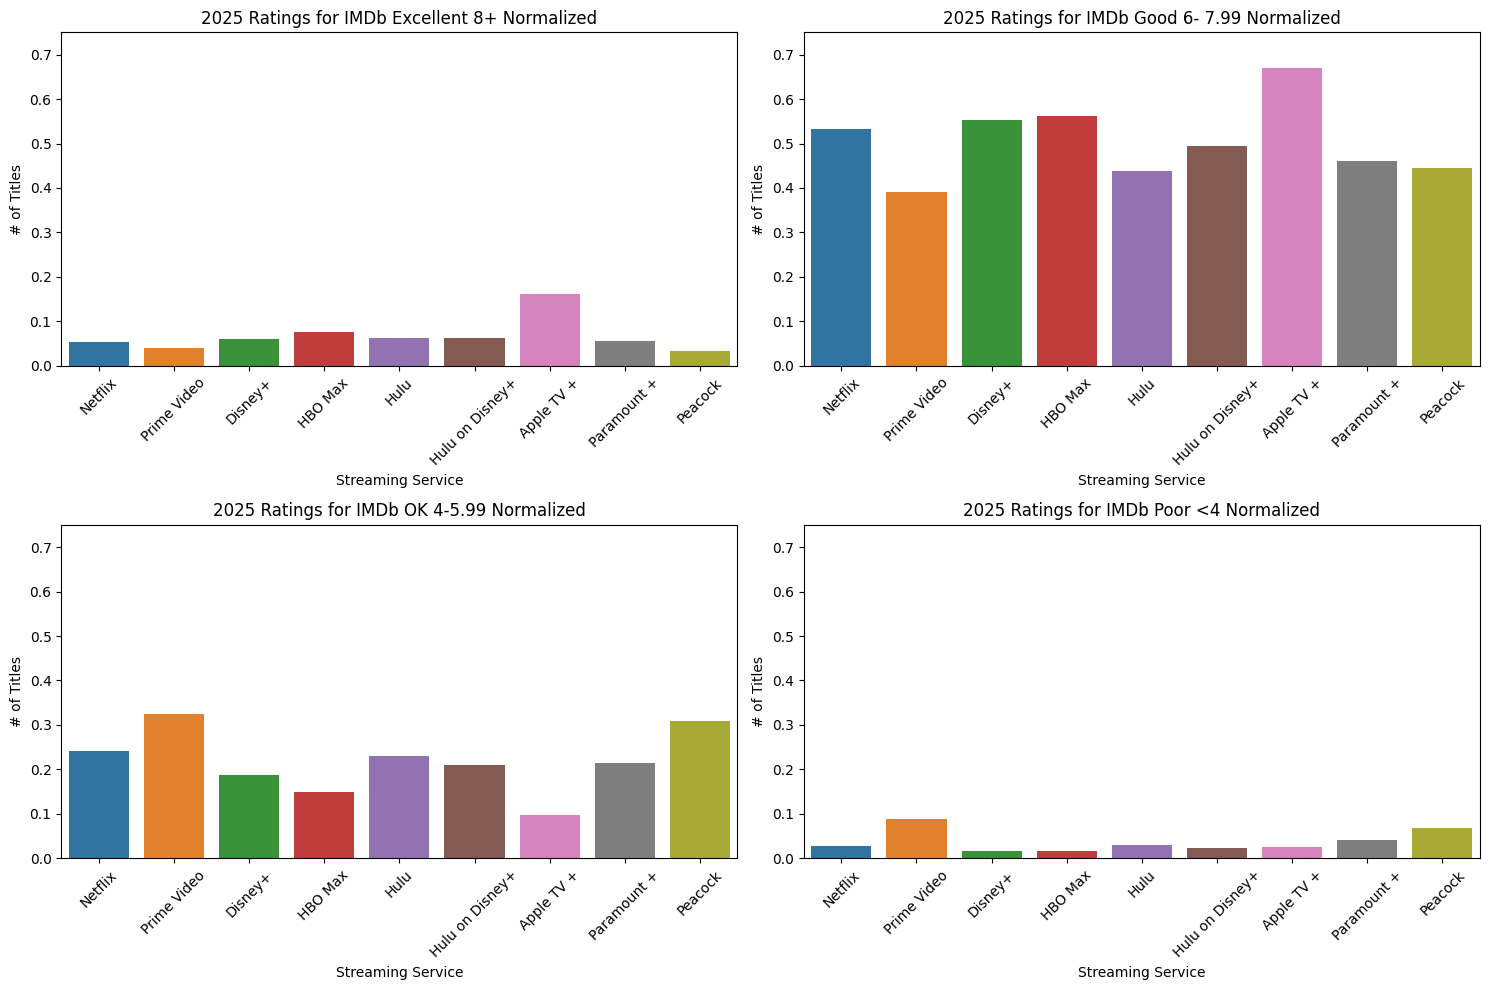

In [ ]:
# What proportion of each streaming service's shows have high ratings?

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i in range(4):
  row = i // 2
  col = i % 2
  sns.barplot(x = rating_df2025_normal.columns[:], y = rating_df2025_normal.iloc[i][:], ax = axs[row, col],hue =  rating_df2025.columns[:], legend = False)
  axs[row, col].tick_params(axis = 'x', rotation=45)
  axs[row, col].set_xlabel("Streaming Service")
  axs[row, col].set_ylabel("# of Titles")
  axs[row, col].set_title(f"2025 Ratings for IMDb{rating_df2025_normal.index[i]} Normalized")
  axs[row, col].set_ylim(0,0.75)

plt.tight_layout()
plt.show()
### Apple Tv seems to have the highest proportion of quality shows and less junk whereas Prime has the most low quality shows



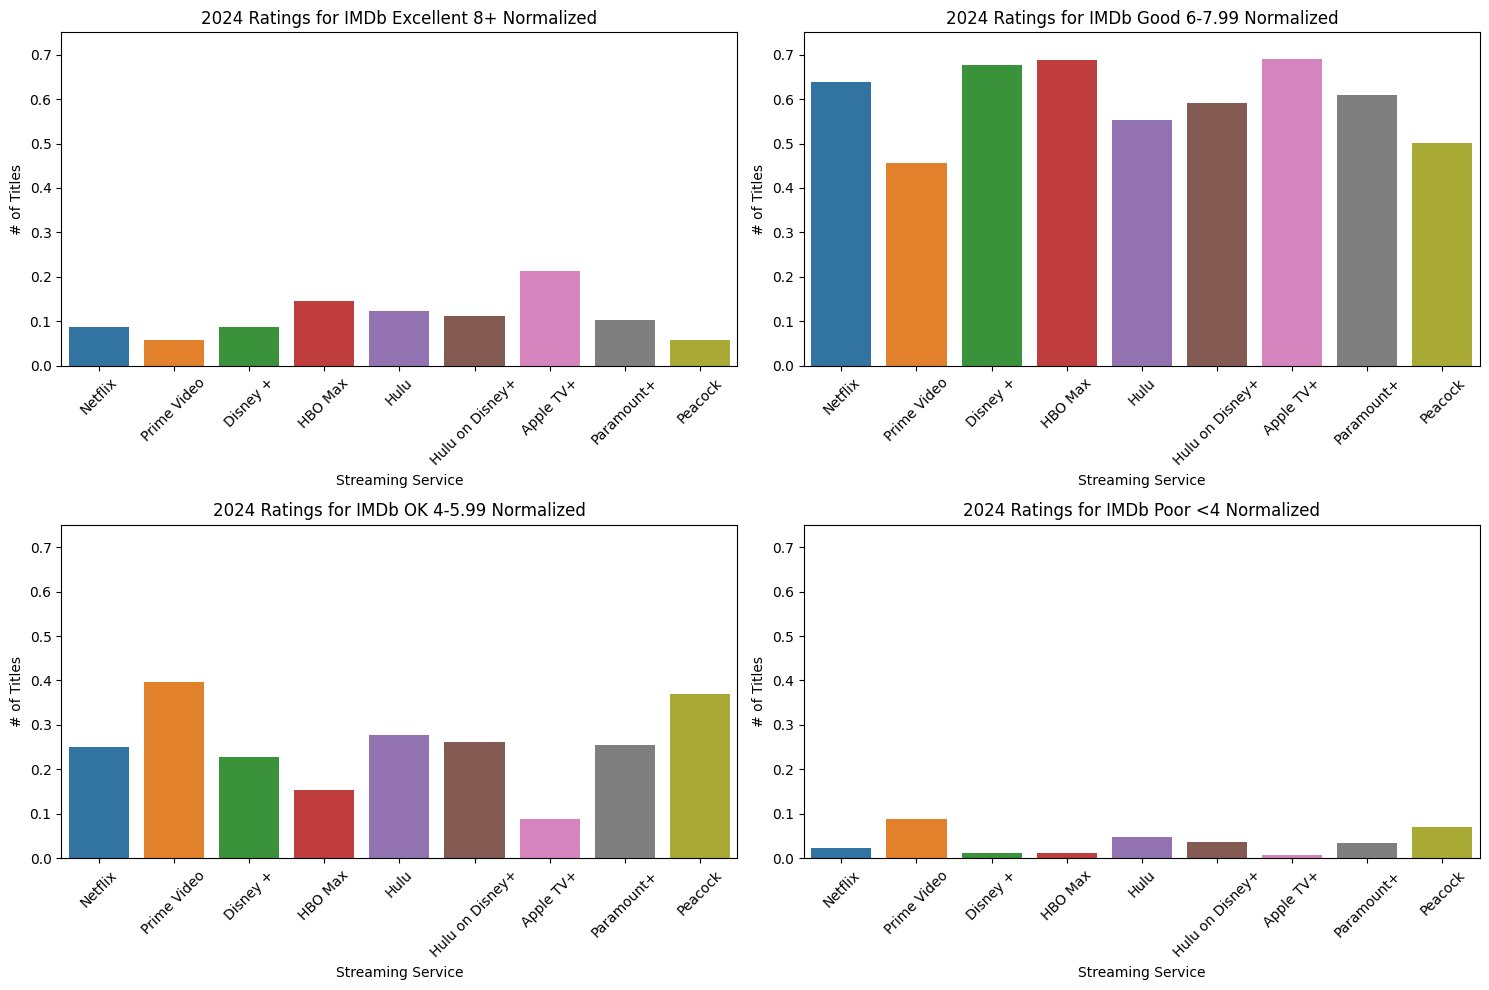

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i in range(4):
  row = i // 2
  col = i % 2
  sns.barplot(x = rating_df2024_normal.columns[:], y = rating_df2024_normal.iloc[i][:], ax = axs[row, col], hue = rating_df2024_normal.columns[:], legend = False)
  axs[row, col].tick_params(axis = 'x', rotation=45)
  axs[row, col].set_xlabel("Streaming Service")
  axs[row, col].set_ylabel("# of Titles")
  axs[row, col].set_title(f"2024 Ratings for IMDb{rating_df2024_normal.index[i]} Normalized")
  axs[row, col].set_ylim(0,0.75)
plt.tight_layout()
plt.show()

### Somewhat different in 2024, has AppleTV improved its selection of media?

In [ ]:
### Data table for value of each streaming service in terms of the number of quality show you get per dollar per month for each streaming services' basic plan

df_data = tables_data[1]

header = ['Per $1 (basic)', 'Apple TV+', 'Disney+', 'HBO Max', 'Hulu', 'Hulu on Disney+*', 'Netflix', 'Paramount+', 'Peacock', 'Prime Video']
perdollar_df = pd.DataFrame(df_data[2:], columns=header)

prefix_list = [ 'Per $1 (basic)', 'Apple TV+', 'Disney+', 'HBO Max', 'Hulu', 'Hulu on Disney+*', 'Netflix', 'Paramount+', 'Peacock', 'Prime Video']
for col in prefix_list:
    perdollar_df[col] = perdollar_df[col].str.replace(col, '')
perdollar_df['Per $1 (basic)'] = perdollar_df['Per $1 (basic)'].str.replace('Row Labels', '')

prefix_list = ['Apple TV+', 'Disney+', 'HBO Max', 'Hulu', 'Hulu on Disney+*', 'Netflix', 'Paramount+', 'Peacock', 'Prime Video']
for col in prefix_list:
    perdollar_df[col] = perdollar_df[col].astype(float)

perdollar_df.set_index('Per $1 (basic)', inplace=True)

perdollar_df


,Apple TV+,Disney+,HBO Max,Hulu,Hulu on Disney+*,Netflix,Paramount+,Peacock,Prime Video
Per $1 (basic),,,,,,,,,
Excellent,6.0,14.0,16.0,15.0,26.0,50.0,6.0,14.0,115.0
Good,25.0,129.0,116.0,103.0,210.0,491.0,50.0,183.0,1105.0
OK,4.0,44.0,31.0,54.0,89.0,222.0,23.0,127.0,914.0
Poor,1.0,4.0,3.0,7.0,10.0,25.0,4.0,28.0,252.0


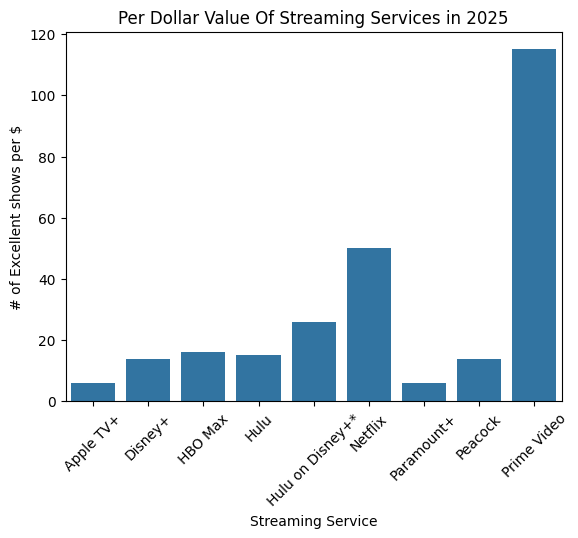

In [ ]:
ax = sns.barplot(x = perdollar_df.columns[:], y = perdollar_df.iloc[0][:])
plt.xticks(rotation=45)

ax.set_title("Per Dollar Value Of Streaming Services in 2025")
ax.set_xlabel("Streaming Service")
ax.set_ylabel("# of Excellent shows per $")

plt.show()
### Prime video gives the most value in terms of number of shows and movies with 8+ rating on IMDb

In [ ]:
### Overall IMDb average rating
df_data = tables_data[5]

header = ['Year', 'Apple TV', 'Disney+', 'HBO Max', 'Hulu', 'Hulu on Disney+', 'Netflix', 'Paramount+', 'Peacock', 'Prime']
IMDbAvg_df = pd.DataFrame(df_data[2:], columns=header)

prefix_list = [ 'Apple TV', 'Disney+', 'HBO Max', 'Hulu', 'Hulu on Disney+', 'Netflix', 'Paramount+', 'Peacock', 'Prime']
for col in prefix_list:
    IMDbAvg_df[col] = IMDbAvg_df[col].str.replace(col, '').astype(float)
IMDbAvg_df['Year'] = IMDbAvg_df['Year'].str.replace('IMDb Rating', '')
IMDbAvg_df.set_index('Year', inplace=True)

IMDbAvg_df

,Apple TV,Disney+,HBO Max,Hulu,Hulu on Disney+,Netflix,Paramount+,Peacock,Prime
Year,,,,,,,,,
2022,7.3,6.7,6.8,6.7,6.7,6.6,6.0,6.9,6.7
2024,7.0,6.7,6.9,6.6,6.7,6.6,6.5,6.2,6.1
2025,7.0,6.5,6.8,6.3,6.4,6.4,6.4,6.0,5.9


In [ ]:
imdb_melted_df = IMDbAvg_df.melt(var_name='Streaming Service', value_name='Count', ignore_index=False)

imdb_melted_df.reset_index(inplace=True)

imdb_melted_df

,Year,Streaming Service,Count
0,2022,Apple TV,7.3
1,2024,Apple TV,7.0
2,2025,Apple TV,7.0
3,2022,Disney+,6.7
4,2024,Disney+,6.7
5,2025,Disney+,6.5
6,2022,HBO Max,6.8
7,2024,HBO Max,6.9
8,2025,HBO Max,6.8
9,2022,Hulu,6.7


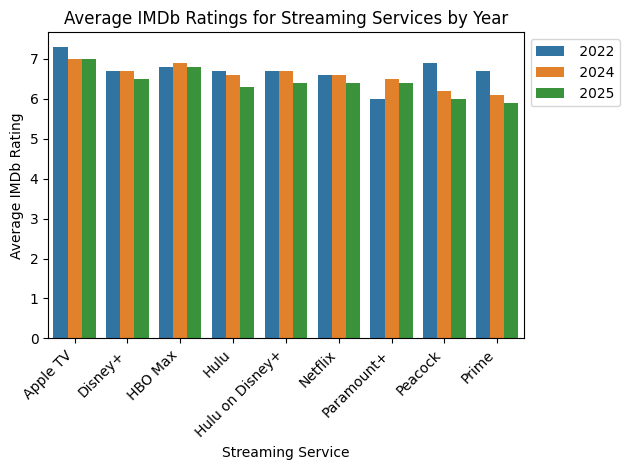

In [ ]:
### How has the average quality of content changed from 2022 to 2025?
ax = sns.barplot(data=imdb_melted_df, x='Streaming Service', y='Count', hue='Year')
plt.title('Average IMDb Ratings for Streaming Services by Year')


# Set labels using the axes object
ax.set_xlabel('Streaming Service')
ax.set_ylabel('Average IMDb Rating')

plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
#Altough Prime has the lowest average, it has the most amount of high quality content as well, graph can be misleading